In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Analyse des Upload-Verhaltens

Im Nachfolgenden soll das Upload-Verhalten des Nachrichtensenders *NTV* analysiert werden. Dabei wird zunächst das Verhalten allgemein, also unabhängig der Kategorien betrachtet. Anschließend wird das Upload-Verhalten innerhalb der einzelnen Kategorien analysiert. Eingangen wird auf die Upload-Uhrzeit und die hochgeladene Textlänge.

## Analyse unabhängig der Kategorien

Zunächst lesen wir die finale `csv`-Datei aus den vorherigen Notebooks ein.

In [9]:
articles_data = pd.read_csv('2-4-data-extended-keywords-sentiment.csv')
articles = pd.DataFrame(articles_data)
articles.head()

date      time category  \
0  2024-05-10  17:14:00  politik   
1  2024-05-10  17:16:00  politik   
2  2024-05-10  19:33:00  politik   
3  2024-05-10  08:40:00  politik   
4  2024-05-10  15:44:00  politik   

                                            headline  \
0   Gruppen treten am Vatertag mit Nazi Symbolik auf   
1  Peking schimpft ueber US Zerstoerer im Suedchi...   
2  SPD Politiker Ecke schildert Sekunden der Prue...   
3  Landkreise fordern haertere Buergergeld Sankti...   
4  Buschmanns Regierungsflieger kehrt in Parkposi...   

                                                text               upload  \
0  Am Vatertag steuern Männer ein altes Militärfa...  2024-05-10 17:14:00   
1  China beansprucht die Paracel-Inseln im Südchi...  2024-05-10 17:16:00   
2  Der vor einer Woche brutal attackierte SPD-Pol...  2024-05-10 19:33:00   
3  Beim Bürgergeld in seiner jetzigen Form bemäng...  2024-05-10 08:40:00   
4  Deutsche Regierungsflieger sind für ihre Panne...  2024-05-10 15:44:00   

   upload-hour weekday  length  \
0           17  Friday    2908   
1           17  Friday    3504   
2           19  Friday    2445   
3            8  Friday    2984   
4           15  Friday    2570   

                                            keywords sentiment_headline  \
0  Politik, Gesellschaft, Extremismus, Rechtsextr...            neutral   
1  China, USA, Paracel-Inseln, Südchinesisches Me...           negative   
2  Politik, Gewalt gegen Politiker, SPD, Wahlkamp...           negative   
3  Bürgergeld, Landkreistag, Vermögensregelungen,...            neutral   
4  Regierungsflugzeug, Technikproblem, Verzögerun...            neutral   

  sentiment_text  sentiment_prob_headline_positive  \
0        neutral                          0.000229   
1        neutral                          0.026734   
2       negative                          0.005901   
3        neutral                          0.000009   
4       negative                          0.000084   

   sentiment_prob_headline_negative  sentiment_prob_headline_neutral  \
0                          0.000604                         0.999167   
1                          0.750409                         0.222857   
2                          0.979033                         0.015065   
3                          0.000026                         0.999965   
4                          0.000253                         0.999663   

   sentiment_prob_text_positive  sentiment_prob_text_negative  \
0                      0.001950                      0.010997   
1                      0.002821                      0.010704   
2                      0.019161                      0.757548   
3                      0.002032                      0.010209   
4                      0.012173                      0.830547   

   sentiment_prob_text_neutral  
0                     0.987053  
1                     0.986475  
2                     0.223291  
3                     0.987759  
4                     0.157280

Nun kann mit der eigentlichen Analyse begonnen werden. Betrachtet wird zunächst die Anzahl an Uploads pro Stunde des Tages. Diese Betrachtung wird unabhängig von Kategorie, Wochentag oder ähnliches durchgeführt.

In [12]:
def create_line_chart_for_uploads_per_hour(articles):
    uploads_per_hour = articles['upload-hour'].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    plt.plot(uploads_per_hour.index, uploads_per_hour.values, marker='o', linestyle='-', color='b')
    plt.title('Uploads per hour')
    plt.xlabel('Hour of day')
    plt.ylabel('Uploads')
    plt.xticks(range(24))
    plt.grid(True)
    plt.show()

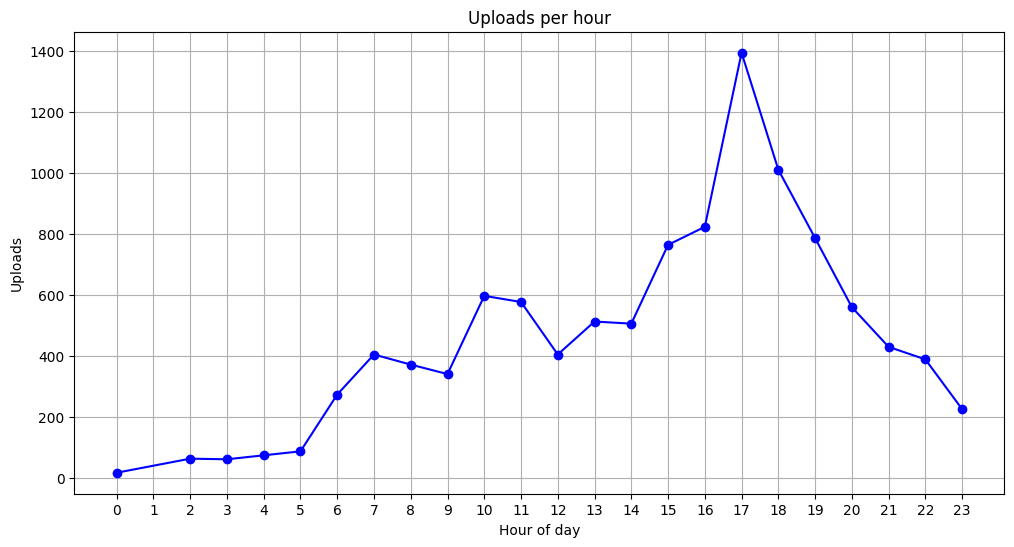

In [13]:
create_line_chart_for_uploads_per_hour(articles)

Das Gleiche kann ebenfalls für die Wochentage durchgeführt werden:

In [14]:
def create_line_chart_for_uploads_per_weekday(articles):
    uploads_per_weekday = articles['weekday'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)
    plt.figure(figsize=(12, 6))
    plt.plot(uploads_per_weekday.index, uploads_per_weekday.values, marker='o', linestyle='-', color='b')
    plt.title('Anzahl der Uploads pro Wochentag')
    plt.xlabel('Wochentag')
    plt.ylabel('Anzahl der Uploads')
    plt.grid(True)
    plt.show()

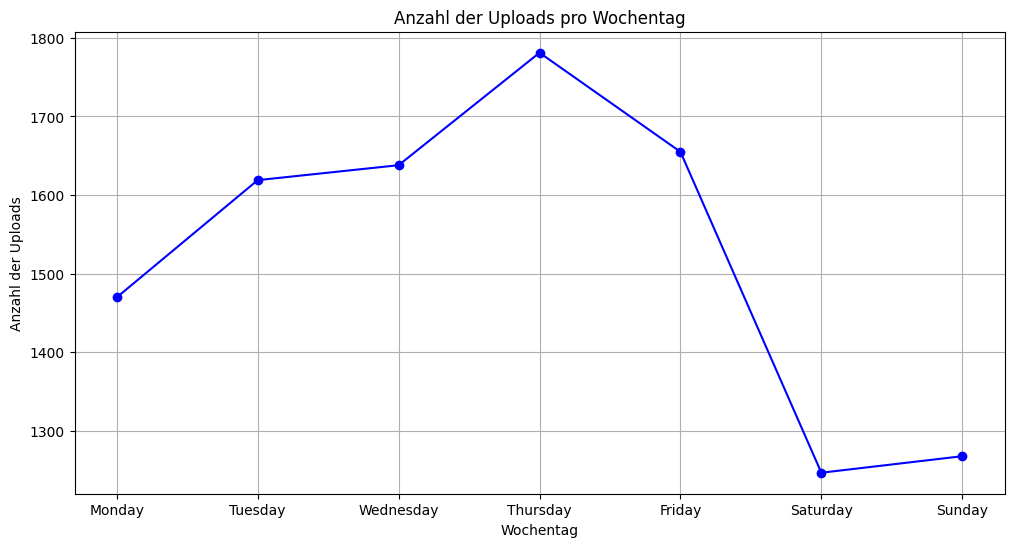

In [15]:
create_line_chart_for_uploads_per_weekday(articles)

Zu sehen ist, dass Samstags und Sonntags vergleichsweise wenige Artikel bei NTV veröffentlicht werden. Der Schwerpunkt liegt scheinbar vorrangig auf Donnerstag. In der folgenden Heatmap werden die Wochentage und Uhrzeiten kombiniert:

In [16]:
def create_heatmap_of_hour_per_weekday(articles):
    heatmap_data = articles.groupby(['weekday', 'upload-hour'], observed=False).size().unstack(fill_value=0).reindex([
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ], fill_value=0)
    plt.figure(figsize=(12, 5))
    sns.heatmap(heatmap_data, annot=True, fmt='d', cbar=False, rasterized=True, cmap="crest")
    plt.title('Uploads per weekday and hour')
    plt.xlabel('Hour')
    plt.ylabel('Weekday')
    plt.show()

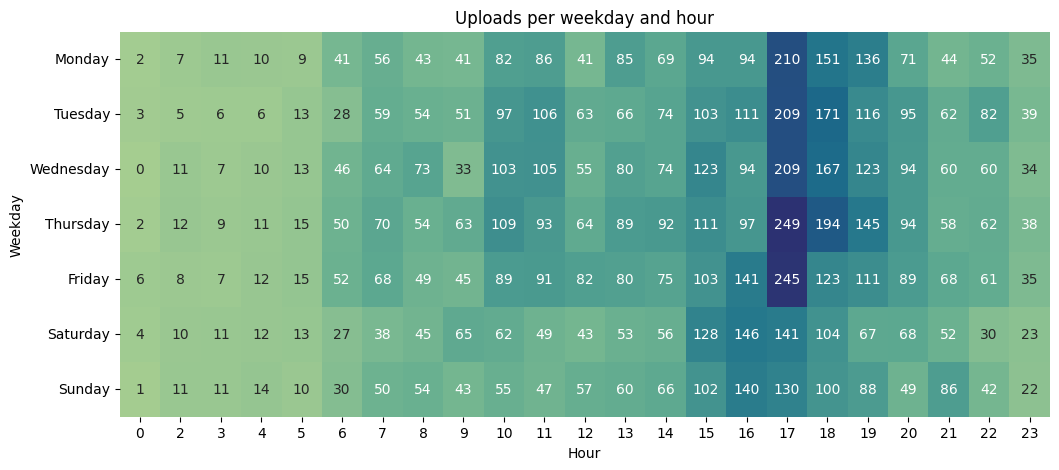

In [17]:
create_heatmap_of_hour_per_weekday(articles)

Untersucht werden kann außerdem, ob sich Länge der Artikel zu den verschiedenen Uhrzeiten und Wochentagen unterscheidet. Als Kennzahl wird hier stets der Median verwendet.

In [24]:
def create_bar_chart_for_median_by_hour_and_by_weekday(articles):
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    articles['weekday'] = pd.Categorical(articles['weekday'], categories=weekday_order, ordered=True)
    median_by_hour = articles.groupby('upload-hour')['length'].median()
    median_by_weekday = articles.groupby('weekday', observed=False)['length'].median()
    median_by_weekday_hour = articles.groupby(['weekday', 'upload-hour'], observed=False)['length'].median().unstack()
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))
    axs[0].bar(median_by_hour.index, median_by_hour.values)
    axs[0].set_title('Median length by hour of upload')
    axs[0].set_xlabel('Upload hour')
    axs[0].set_ylabel('Median length')
    axs[1].bar(median_by_weekday.index, median_by_weekday.values)
    axs[1].set_title('Median length by weekday')
    axs[1].set_xlabel('Weekday')
    axs[1].set_ylabel('Median length')
    axs[1].set_xticks(range(len(weekday_order)))
    axs[1].set_xticklabels(weekday_order)
    plt.tight_layout()
    plt.show()

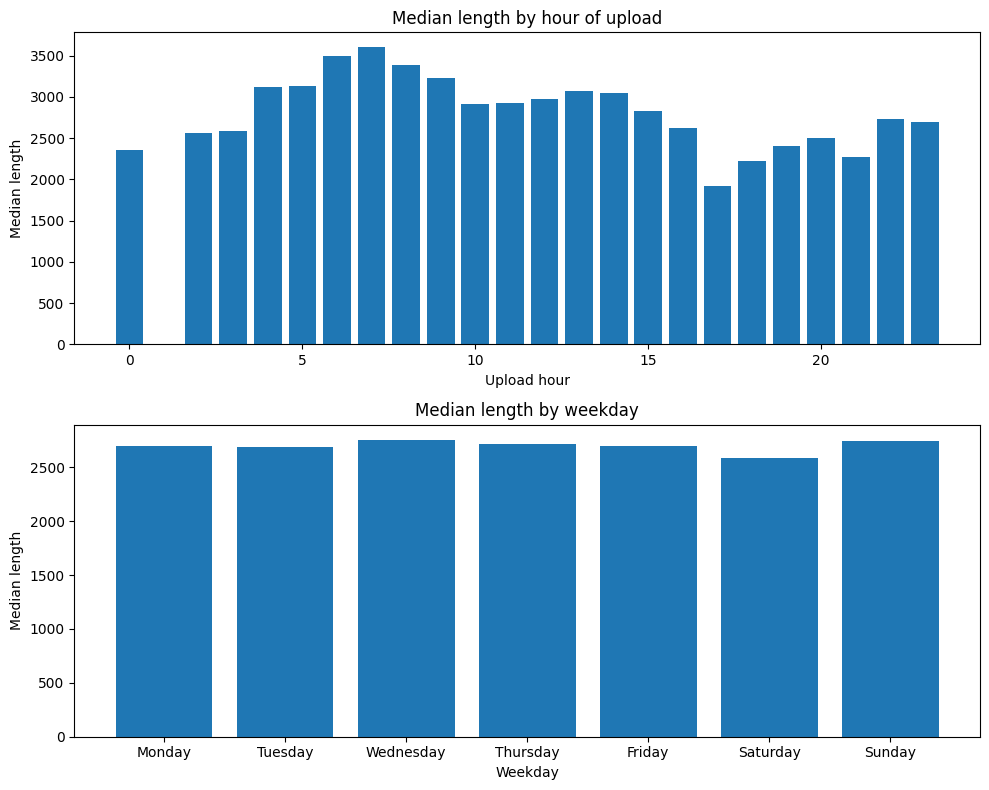

In [25]:
create_bar_chart_for_median_by_hour_and_by_weekday(articles)

Auch hier können Wochentage und Uhrzeit in einer Heatmap kombiniert werden.

In [27]:
def create_heatmap_of_article_length_by_hour_and_weekday(articles):
    median_data = articles.groupby(['upload-hour', 'weekday'], observed=False)['length'].median().reset_index()
    pivot_data = median_data.pivot_table(index='weekday', columns='upload-hour', values='length', aggfunc='median', observed=False)
    plt.figure(figsize=(22, 10))
    sns.heatmap(pivot_data, annot=True, rasterized=True, cmap="crest", fmt='.1f')
    plt.title('Median of length after upload hour and weekday')
    plt.xlabel('Hour')
    plt.ylabel('Weekday')
    plt.show()

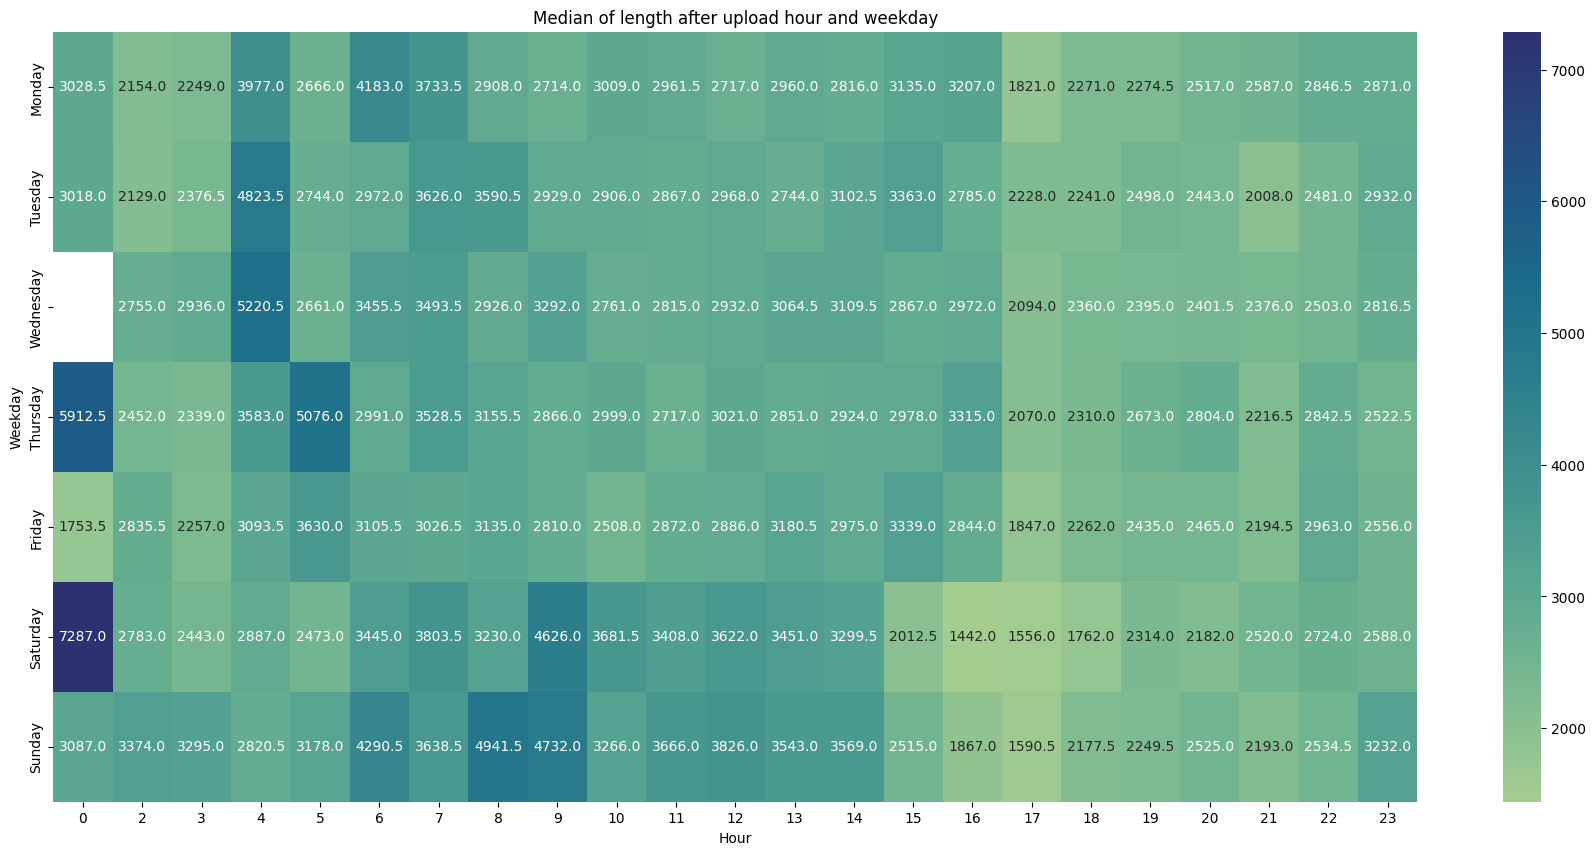

In [28]:
create_heatmap_of_article_length_by_hour_and_weekday(articles)

Zu sehen ist, dass grundsätzlich längere Texte eher vor 17 Uhr veröffentlicht werden, nach 17 Uhr geht der Median der Textlängen leicht zurück.

## Analyse abhängig von Kategorien

Es wird nun betrachtet zu welcher Stunde in den jeweiligen Kategorien die meisten Uploads stattgefunden haben.

In [31]:
def create_heatmap_plots_for_hours_per_category(articles):
    upload_counts = articles.groupby(['category', 'upload-hour']).size().unstack(fill_value=0)
    for category in upload_counts.index:
        plt.figure(figsize=(24, 1))
        sns.heatmap(upload_counts.loc[[category]], annot=True, fmt='d', cbar=False, rasterized=True, cmap="crest")
        plt.title(f'Uploads per hour for category: {category}')
        plt.xlabel('hour')
        plt.yticks([])
        plt.show()

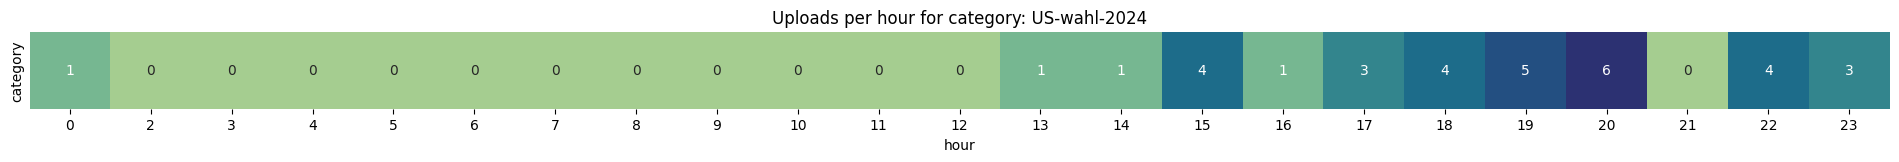

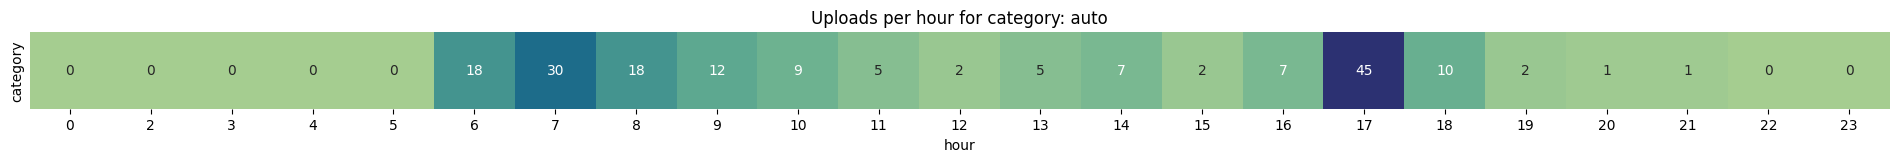

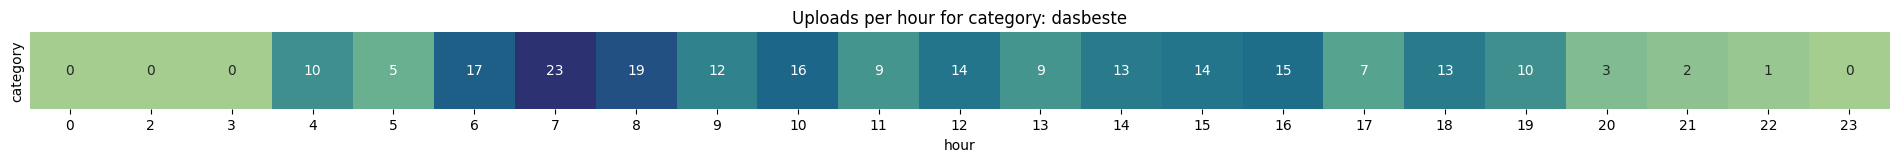

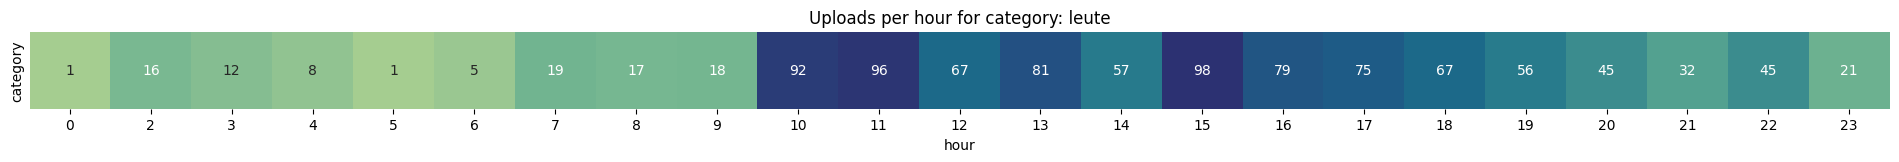

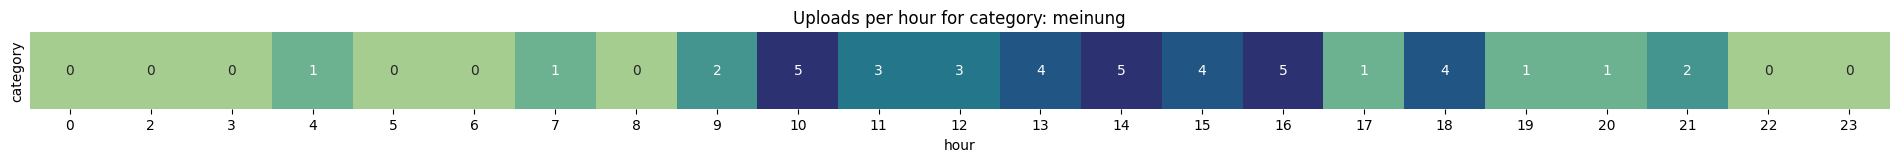

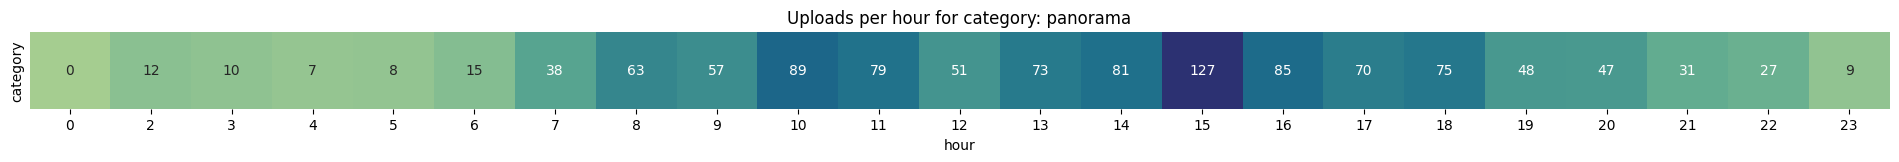

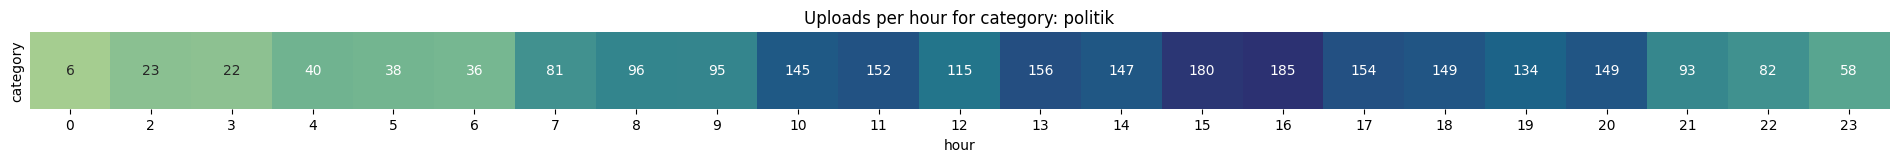

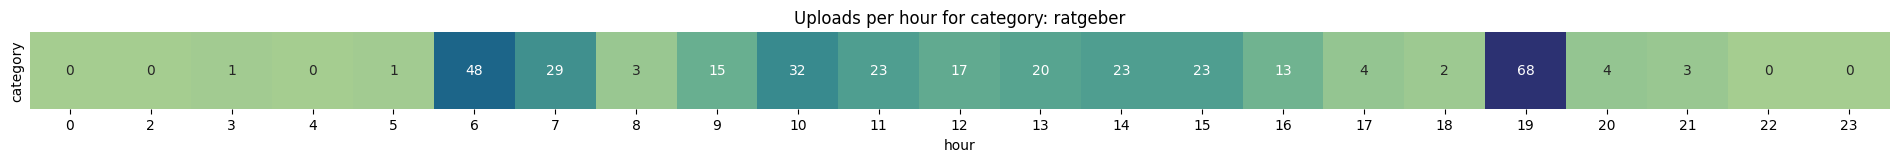

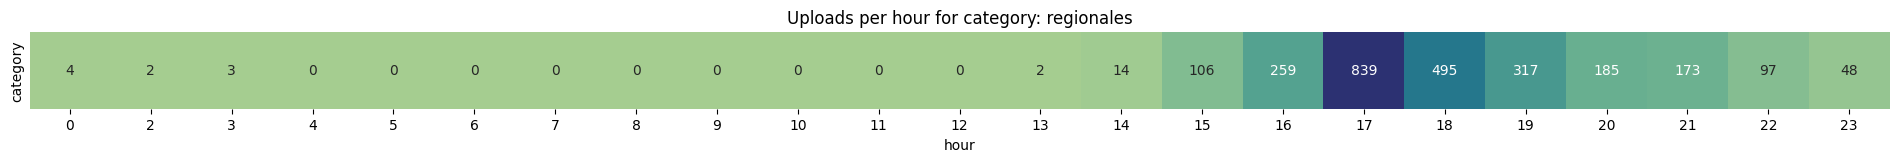

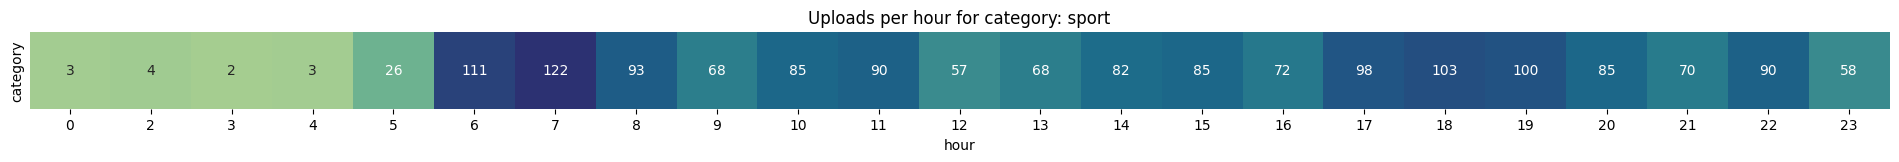

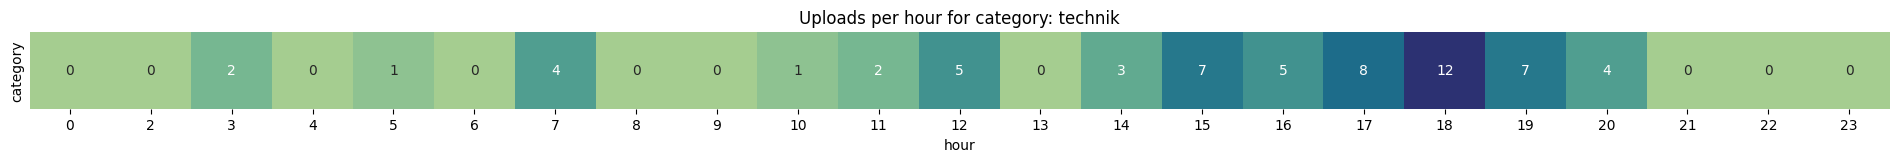

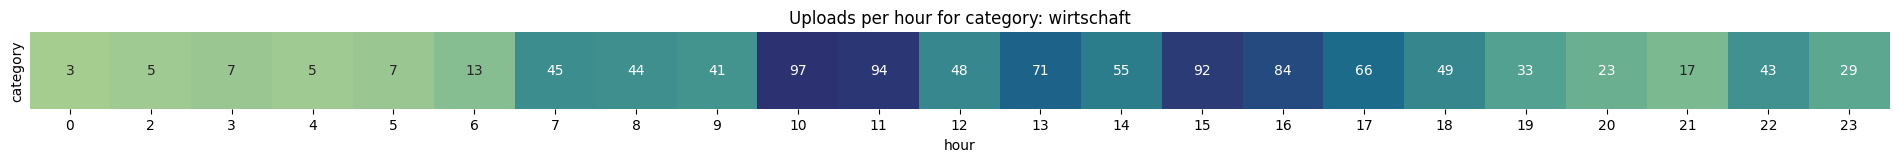

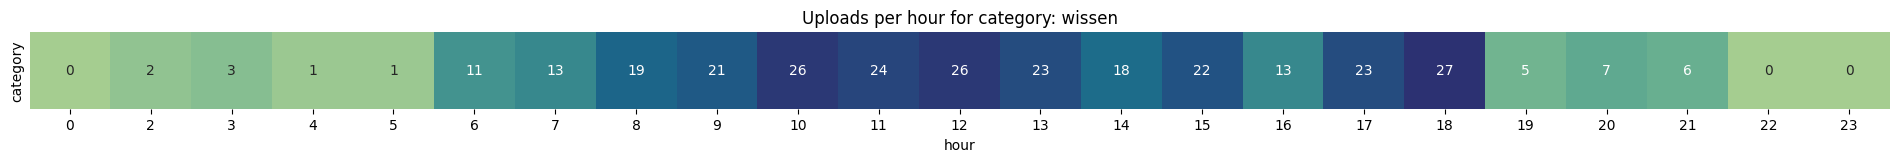

In [32]:
create_heatmap_plots_for_hours_per_category(articles)

Skaliert und vereint sehen die obigen Daten anschließend wie folgt aus:

In [34]:
def create_heatmap_plots_for_articles_per_hour_unified(articles):
    heatmap_data = articles.groupby(['category', 'upload-hour']).size().unstack(fill_value=0)
    scaled_heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100
    plt.figure(figsize=(10, 6))
    sns.heatmap(scaled_heatmap_data, annot=False, cbar=False, rasterized=True, cmap="crest")
    plt.title('Uploads by category and hour')
    plt.xlabel('Hour')
    plt.ylabel('Category')
    plt.show()

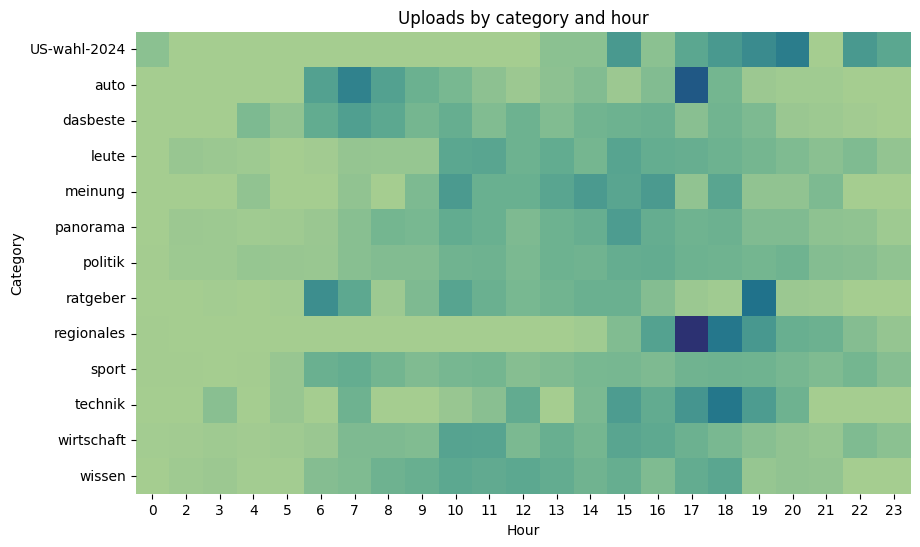

In [35]:
create_heatmap_plots_for_articles_per_hour_unified(articles)

Das gleiche kann ebenfalls anstatt für die Stunden für die jeweiligen Wochentage erstellt werden. Dazu werden zunächst aus der Spalte `upload` die Wochentage extrahiert und in einer neuen Spalte gespeichert. Da die Pandas-Funktion `dayofweek` nur Zahlen anstatt die entsprechenden Namen zurückgibt, werden die Nummern zu den Bezeichnungen gemapped und die Spalte mit den Bezeichnungen überschrieben.

In [44]:
def create_bar_plots_for_articles_per_weekday(articles):
    upload_weekday_counts = articles.groupby(['category', 'weekday'], observed=False).size().unstack(fill_value=0)
    upload_weekday_counts = upload_weekday_counts.reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    for category in upload_weekday_counts.index:
        plt.figure(figsize=(10, 2))
        sns.barplot(x=upload_weekday_counts.columns, y=upload_weekday_counts.loc[category].values)
        plt.title(f'Upload-Verhalten für Kategorie: {category}')
        plt.xlabel('Wochentag')
        plt.ylabel('Anzahl der Artikel')
        plt.xticks(rotation=45)
        plt.show()

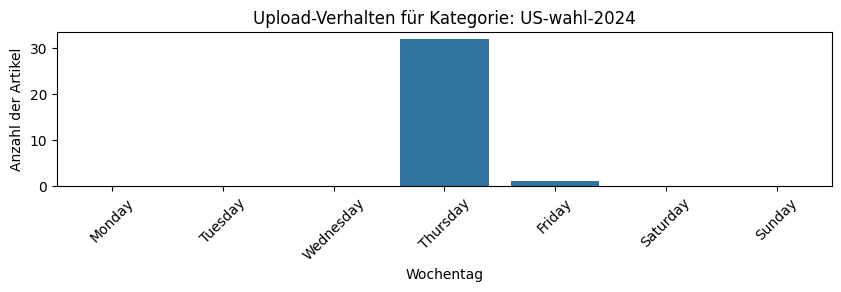

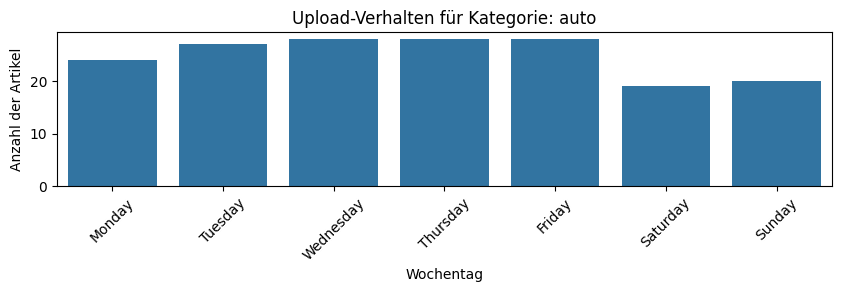

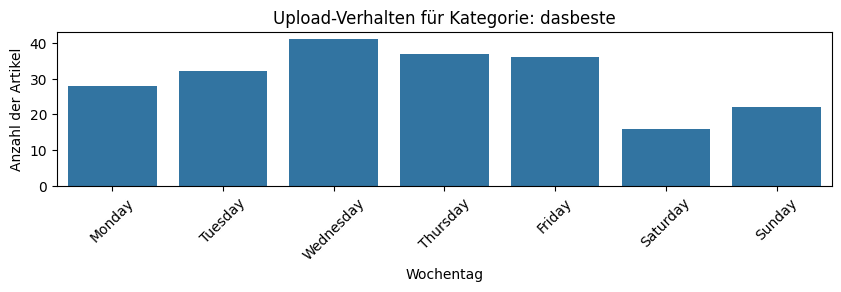

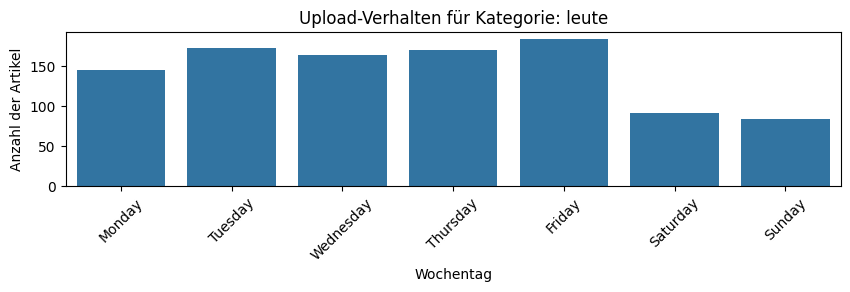

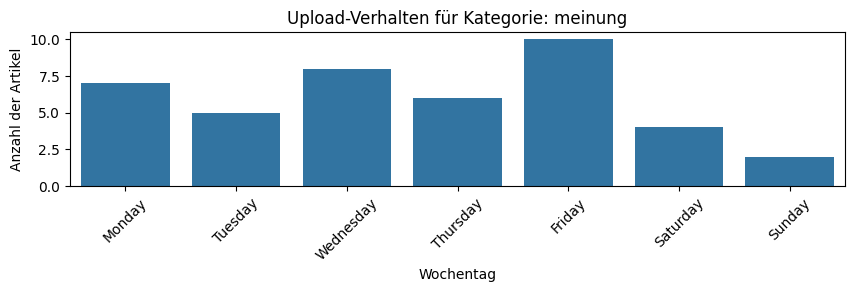

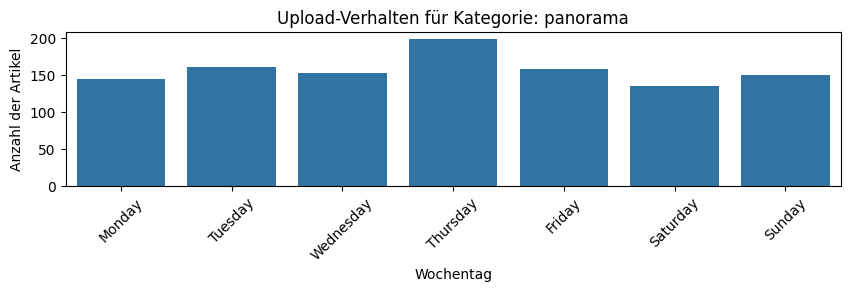

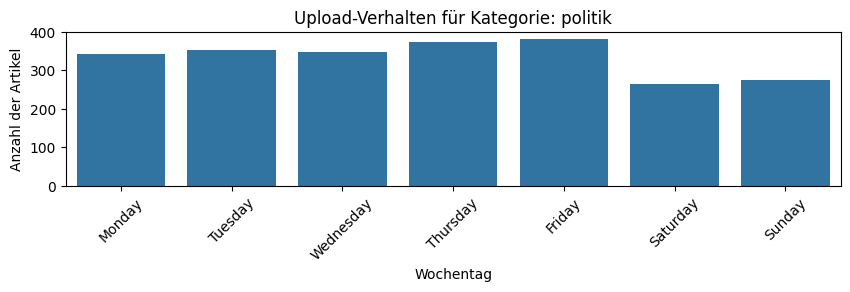

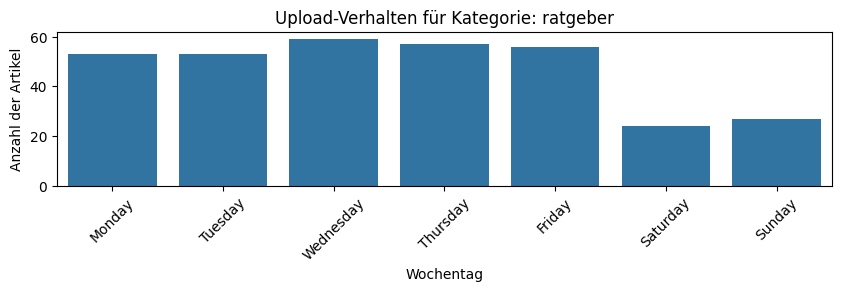

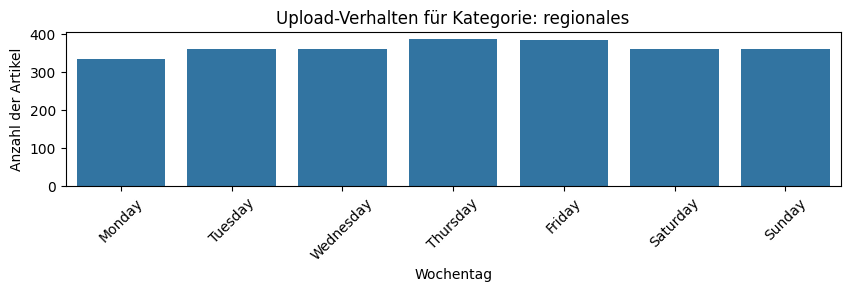

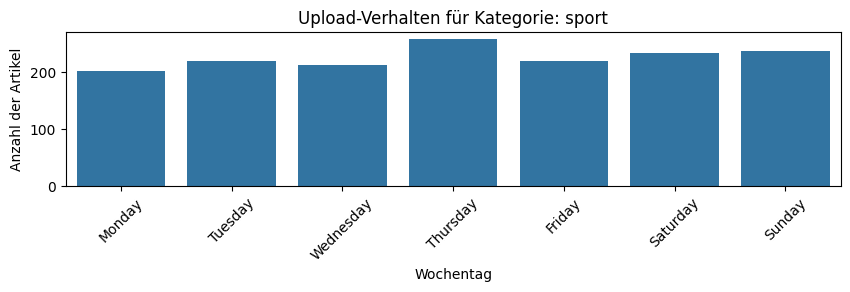

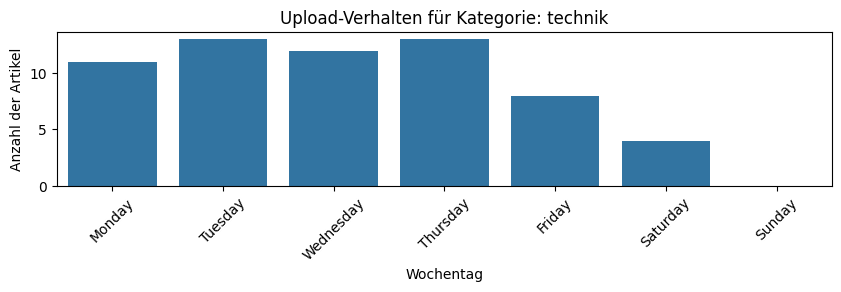

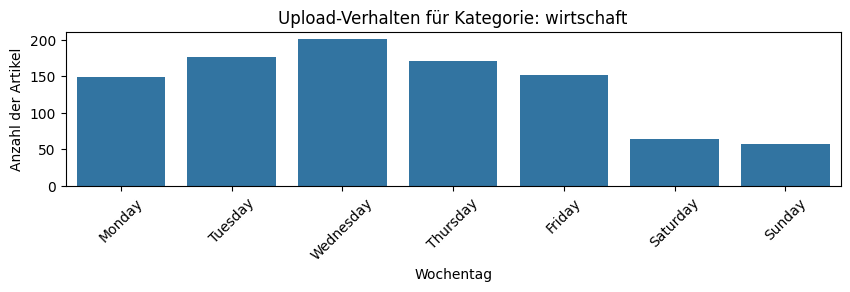

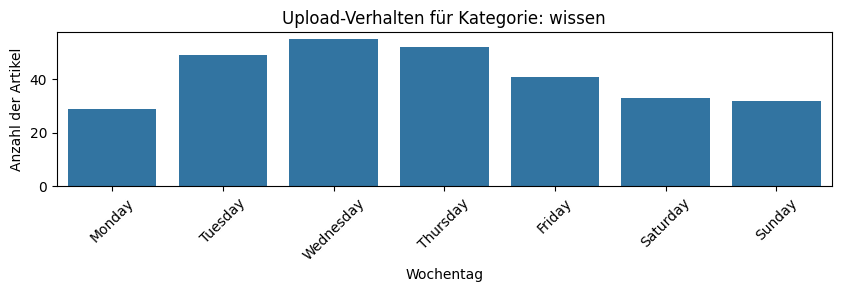

In [45]:
create_bar_plots_for_articles_per_weekday(articles)

In [49]:
def create_heatmap_plots_for_articles_per_weekday_unified(articles):
    heatmap_data = articles.groupby(['category', 'weekday'], observed=False).size().unstack(fill_value=0)
    scaled_heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0) * 100
    plt.figure(figsize=(10, 6))
    sns.heatmap(scaled_heatmap_data, annot=False, cbar=False, rasterized=True, cmap="crest")
    plt.title('Uploads per category and hour')
    plt.xlabel('Weekday')
    plt.ylabel('Category')
    plt.show()

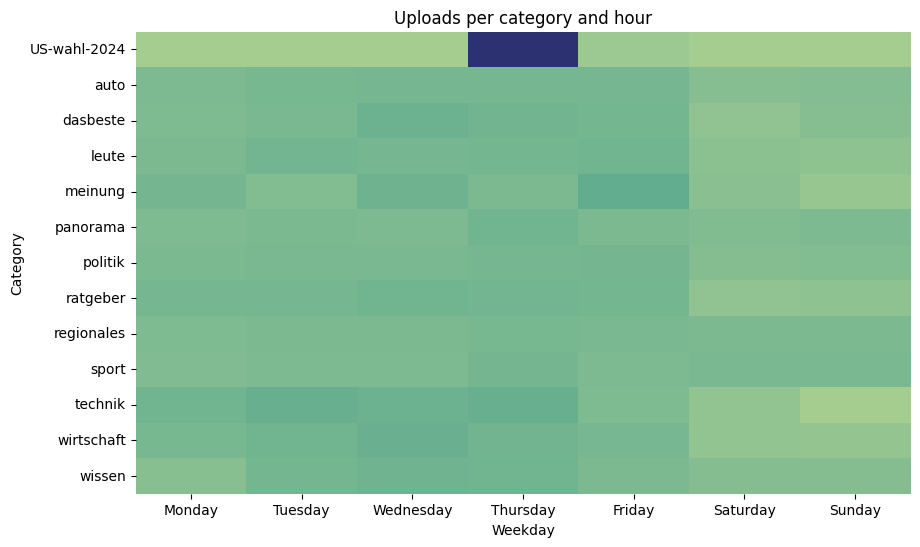

In [50]:
create_heatmap_plots_for_articles_per_weekday_unified(articles)

Uploads pro Stunde pro Wochentag pro Kategorie.

In [58]:
def create_heatmap_plots_for_articles_per_hour_per_weekday(articles):
    categories = articles['category'].unique()
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    hours = np.arange(0, 24)
    index = pd.MultiIndex.from_product([categories, weekdays, hours], names=['Category', 'Weekday', 'Hour'])
    upload_category_weekday_hour_counts = articles.groupby(['category', 'weekday', 'upload-hour'], observed=False).size().reindex(index, fill_value=0).unstack(level='Hour')
    upload_category_weekday_hour_counts = upload_category_weekday_hour_counts.reindex(weekdays, level='Weekday')
    for category in categories:
        plt.figure(figsize=(14, 4))
        sns.heatmap(upload_category_weekday_hour_counts.loc[category], annot=True, fmt='d', cbar=False, rasterized=True, cmap="crest")
        plt.title(f'Upload-Verhalten für Kategorie: {category}')
        plt.xlabel('hour of day')
        plt.ylabel('weekday')
        plt.show()

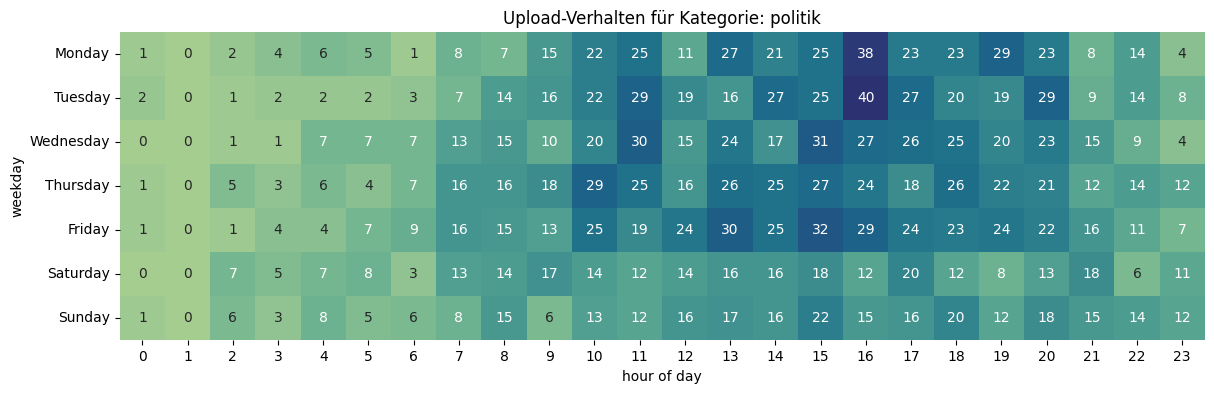

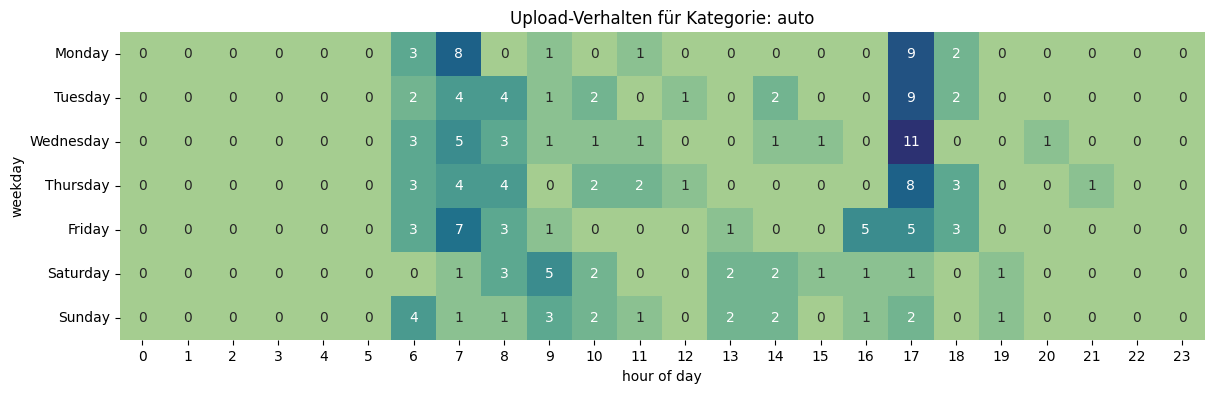

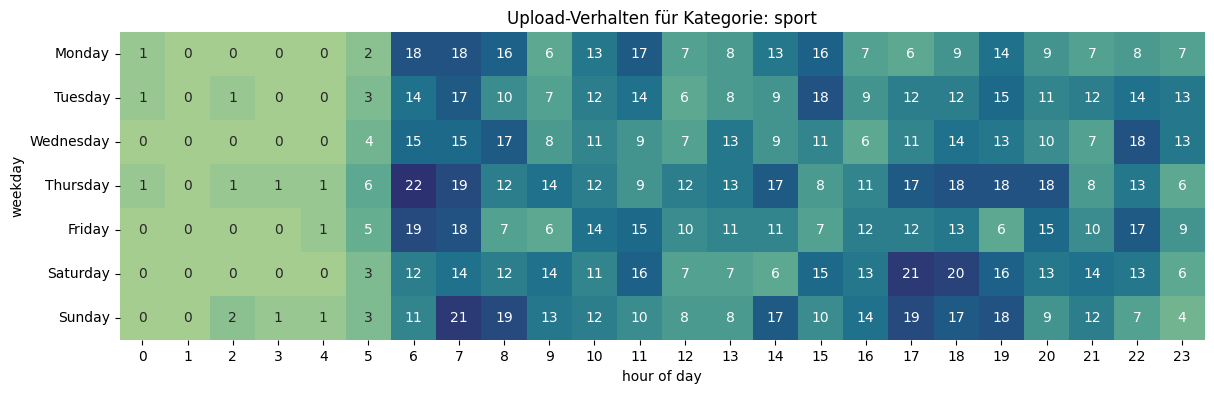

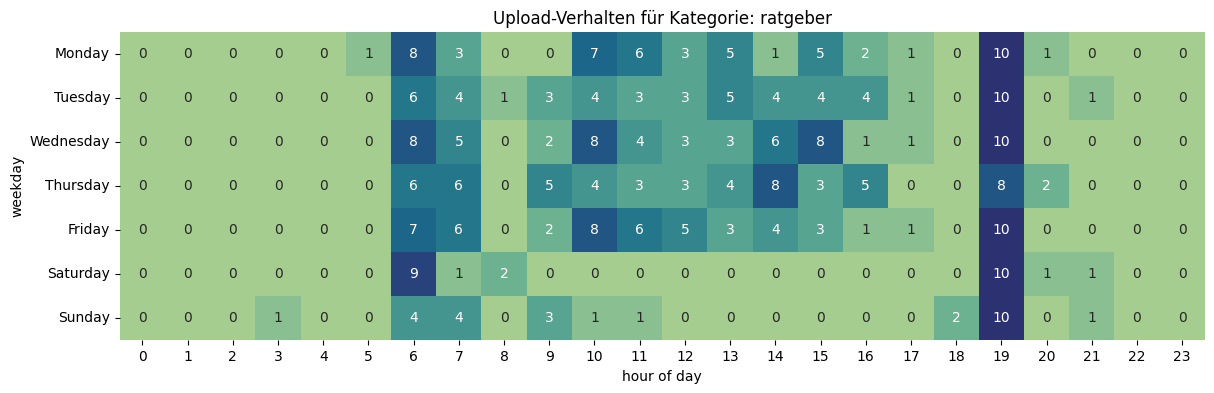

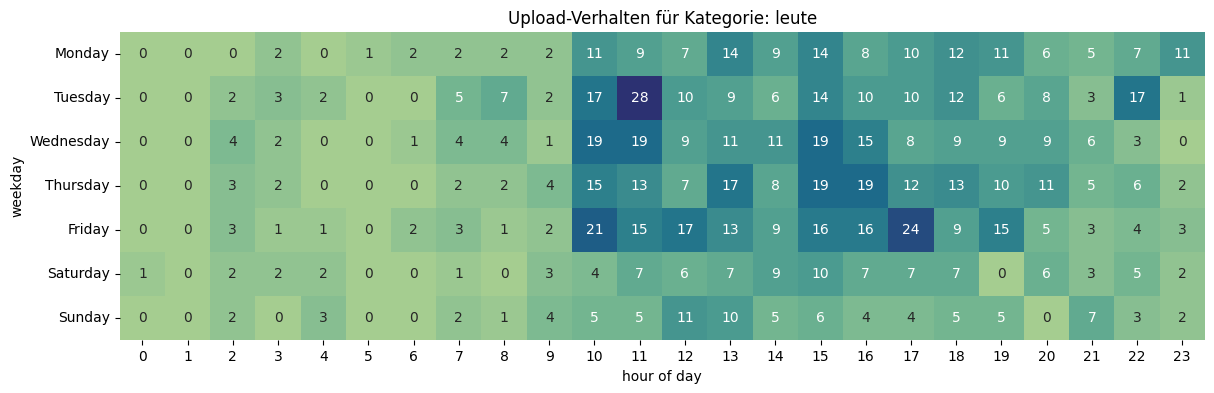

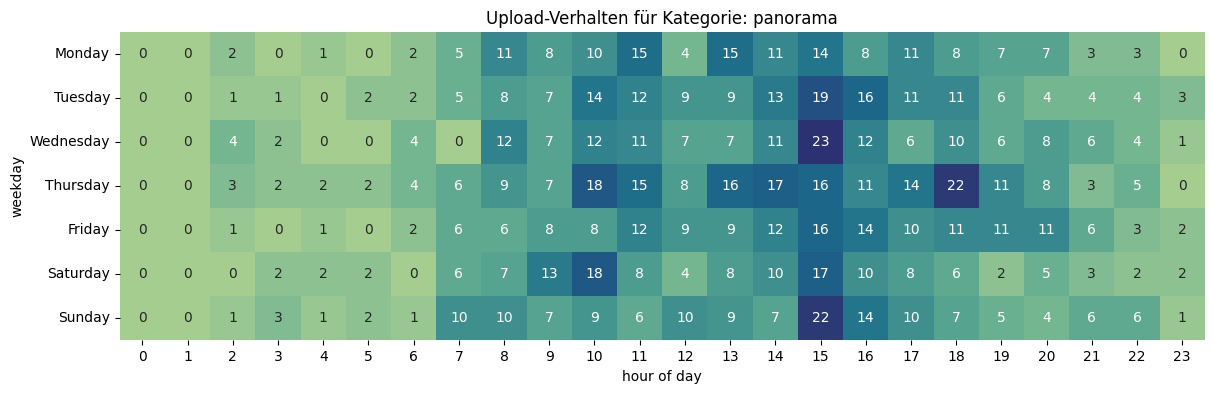

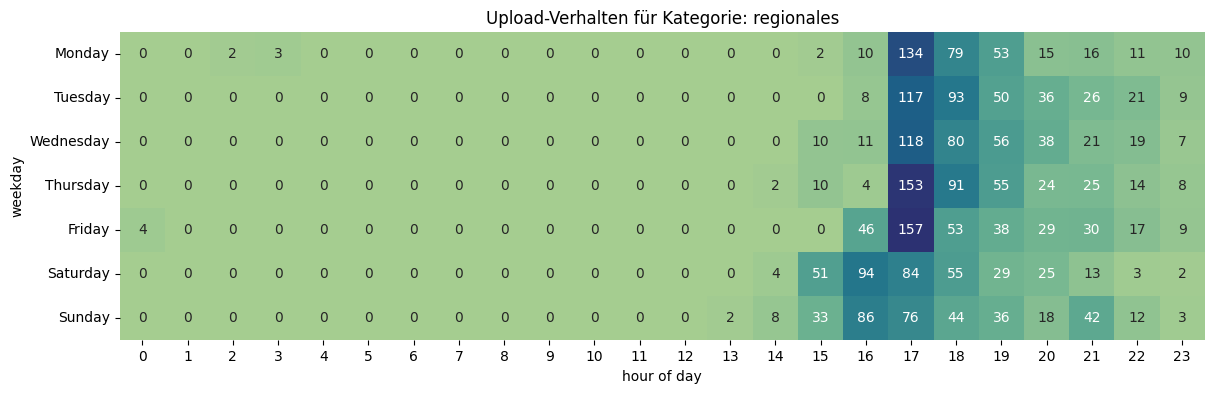

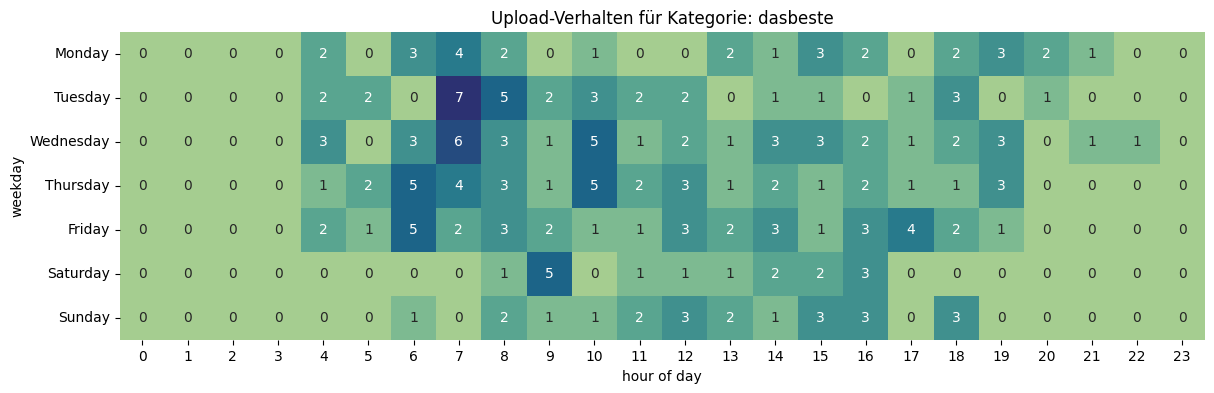

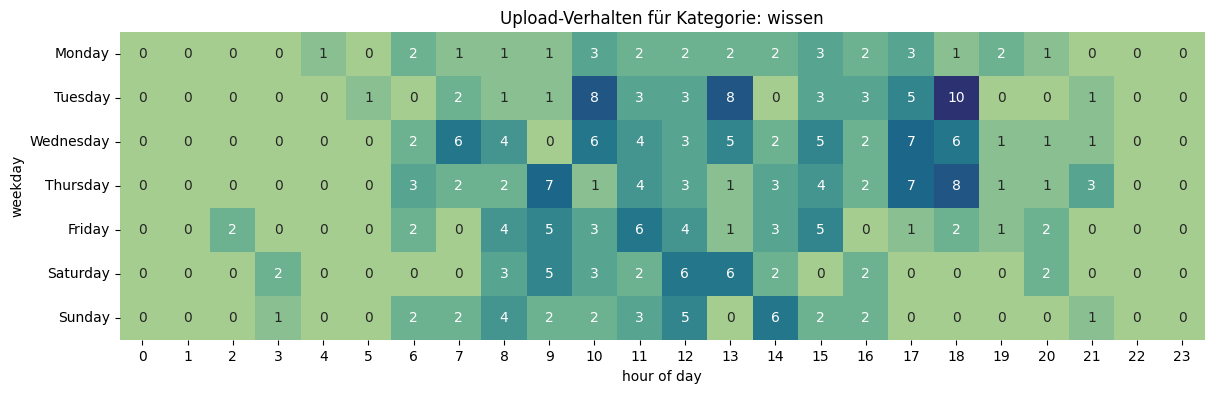

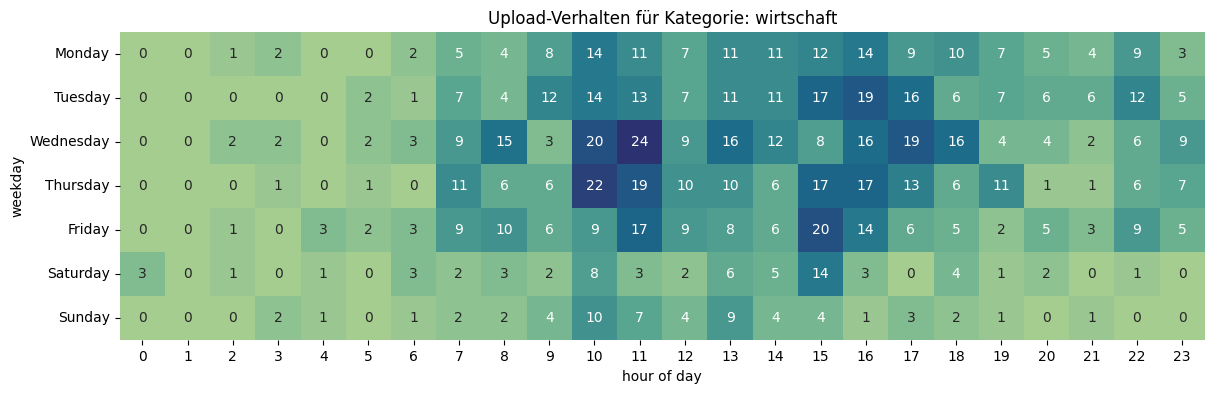

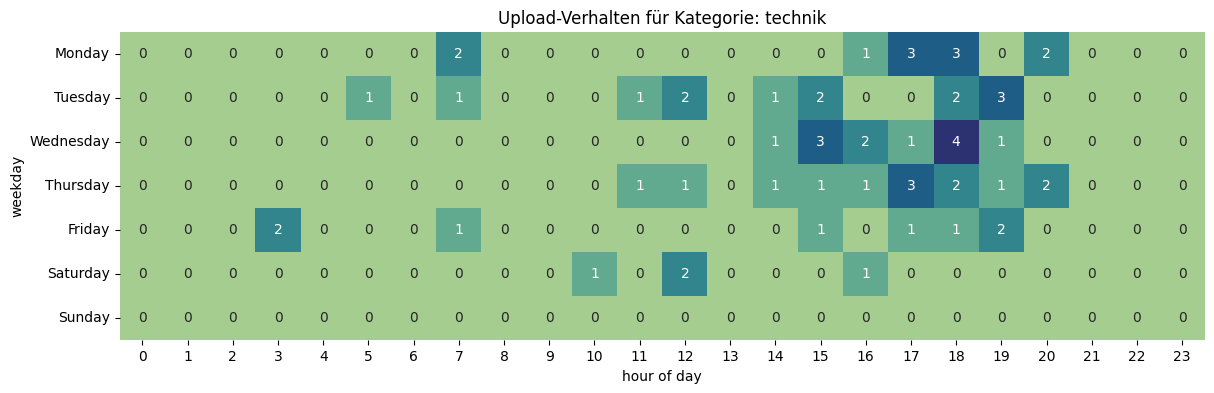

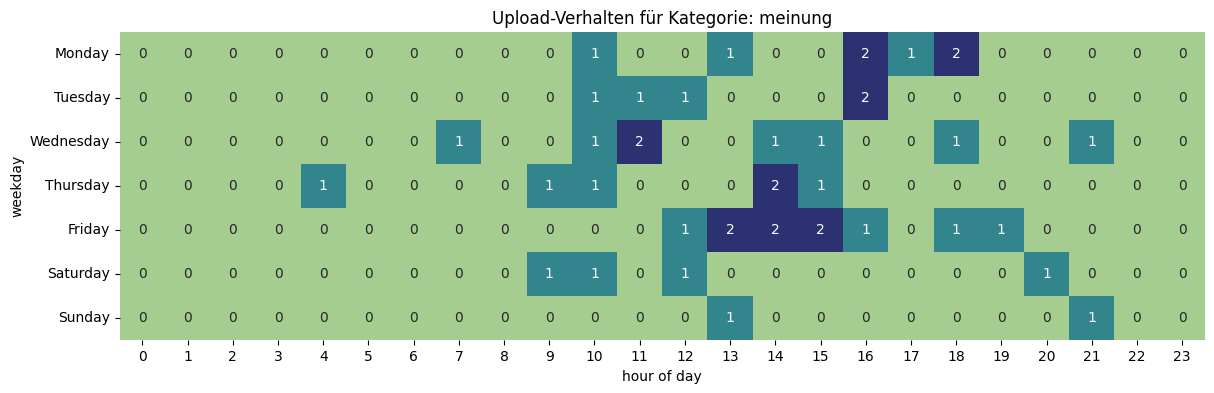

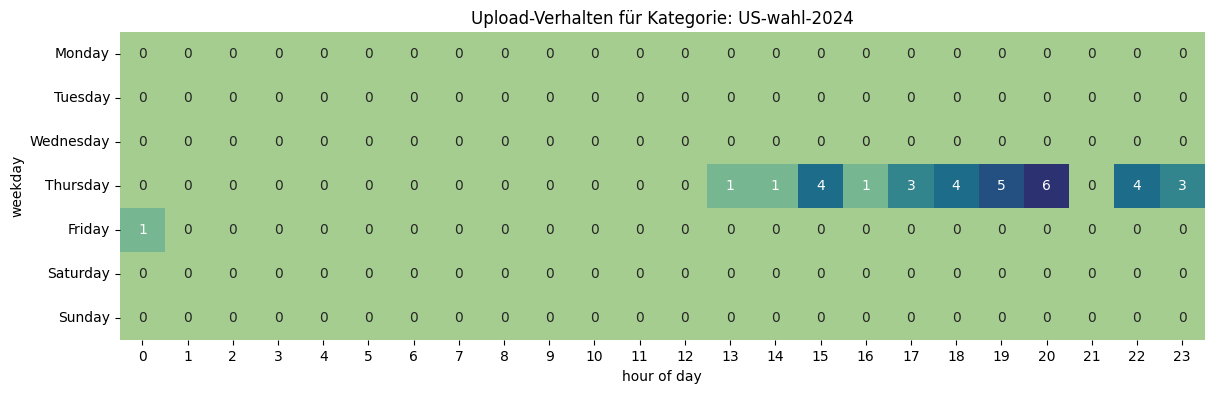

In [59]:
create_heatmap_plots_for_articles_per_hour_per_weekday(articles)

## Artikellängen nach Kategorie

In [60]:
def create_bar_chart_for_length_per_category(articles):
    median_by_category = articles.groupby('category')['length'].median().reset_index()
    plt.figure(figsize=(18, 6))
    sns.barplot(x='category', y='length', data=median_by_category)
    plt.title('Median length of category')
    plt.xlabel('Category')
    plt.ylabel('Median')
    plt.show()

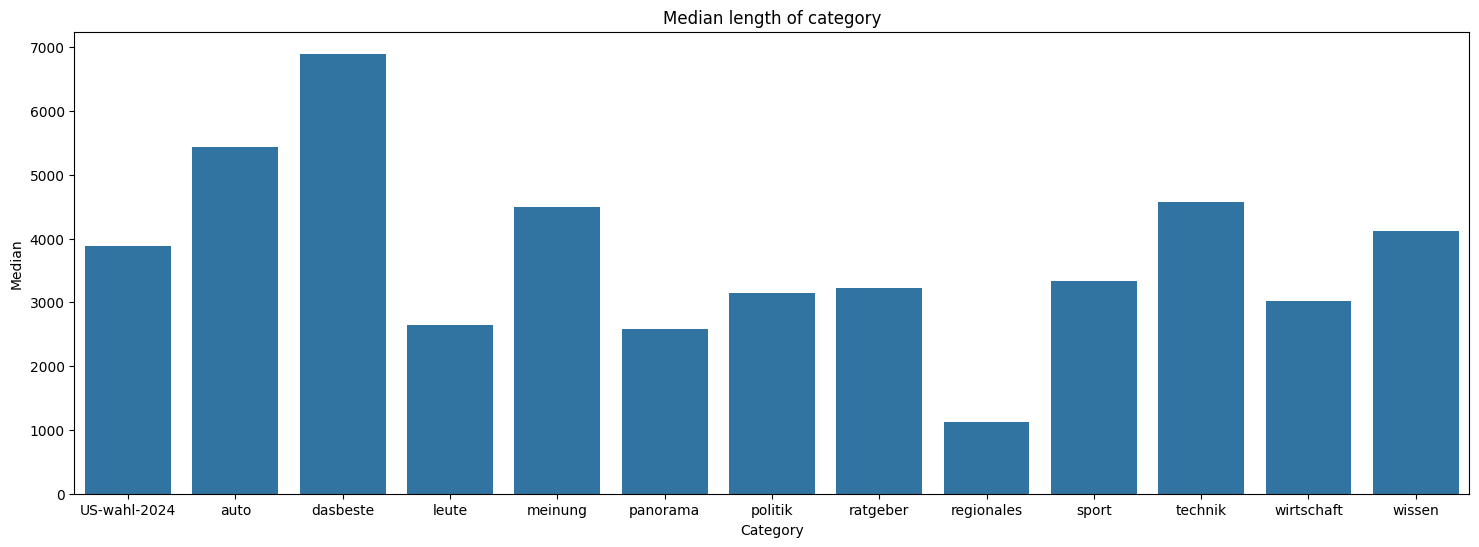

In [61]:
create_bar_chart_for_length_per_category(articles)

Zu sehen ist, dass die Regionalen Artikel, von denen die meisten existieren, die kürzeste Länge im Median besitzen.

In [66]:
def create_heatmap_for_length_per_category_by_hour_and_weekday(articles):
    categories = articles['category'].unique()
    for category in categories:
        category_data = articles[articles['category'] == category]
        median_data = category_data.groupby(['upload-hour', 'weekday'], observed=False)['length'].median().reset_index()
        pivot_data = median_data.pivot_table(index='weekday', columns='upload-hour', values='length', aggfunc='median', observed=False)
        plt.figure(figsize=(23, 5))
        sns.heatmap(pivot_data, annot=True, rasterized=True, cmap="crest", fmt='.0f')
        plt.title(f'Median of length for category "{category}" by upload hour and weekday')
        plt.xlabel('Hour')
        plt.ylabel('Weekday')
        plt.show()

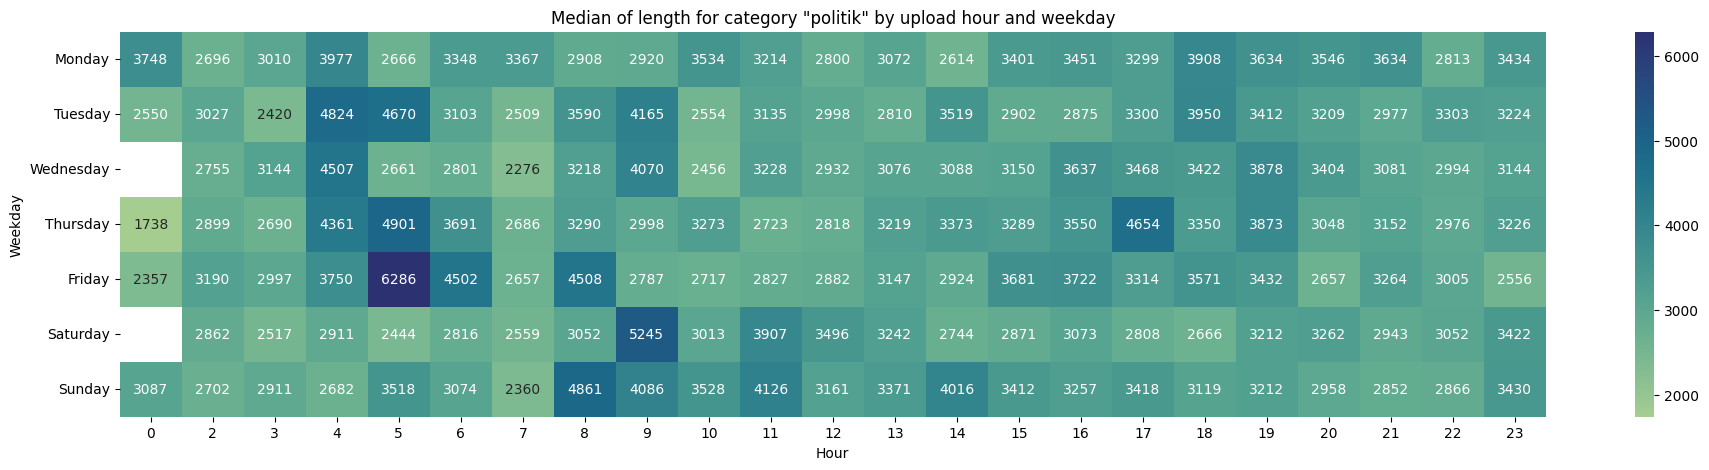

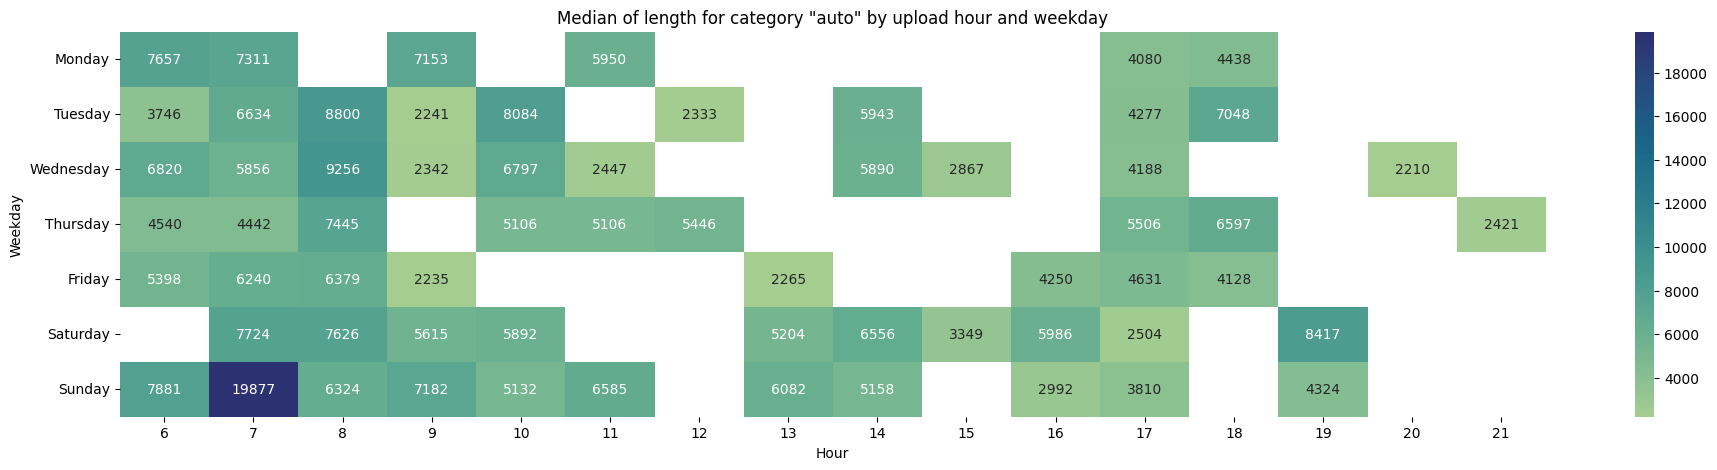

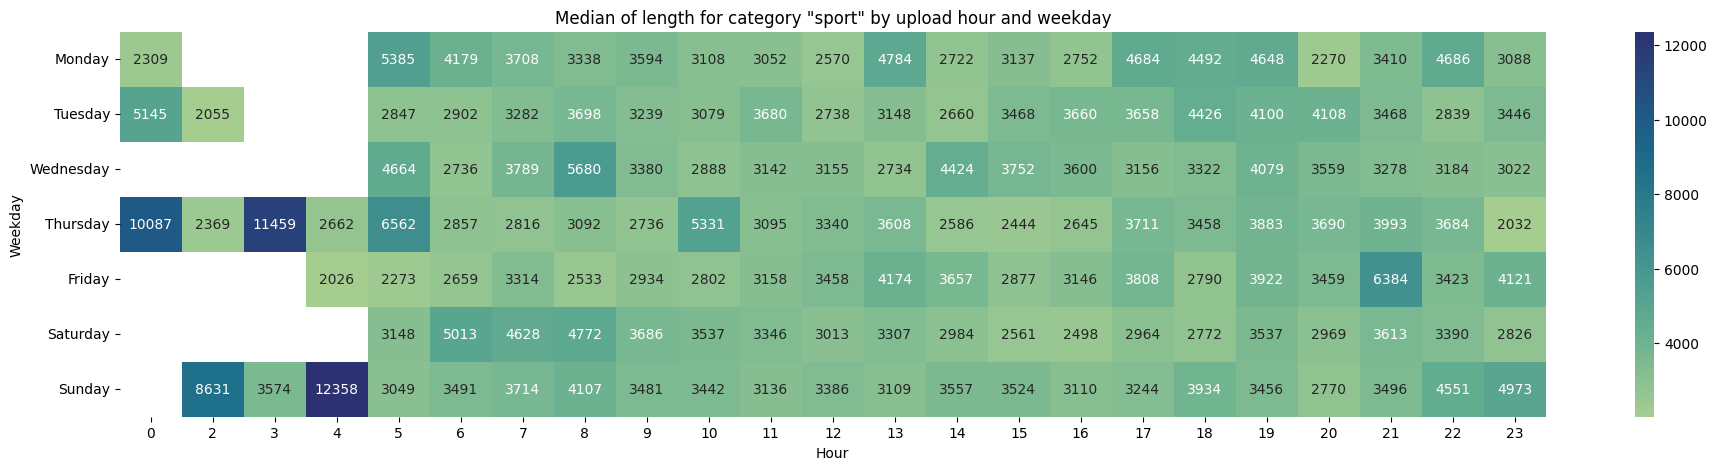

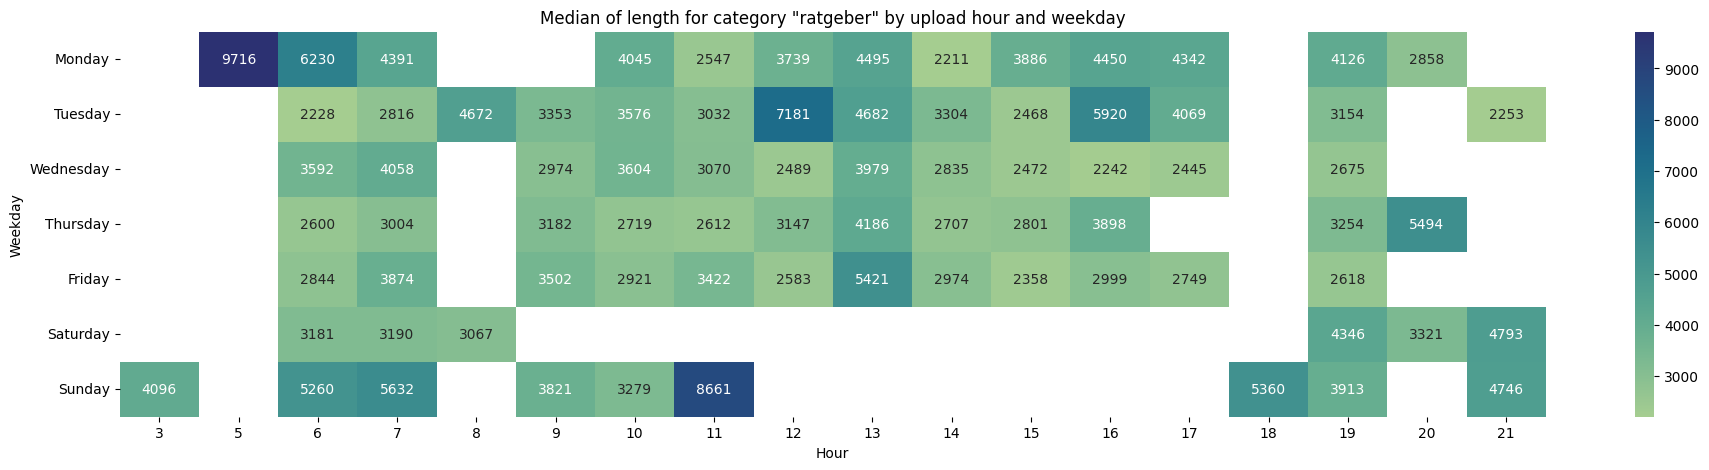

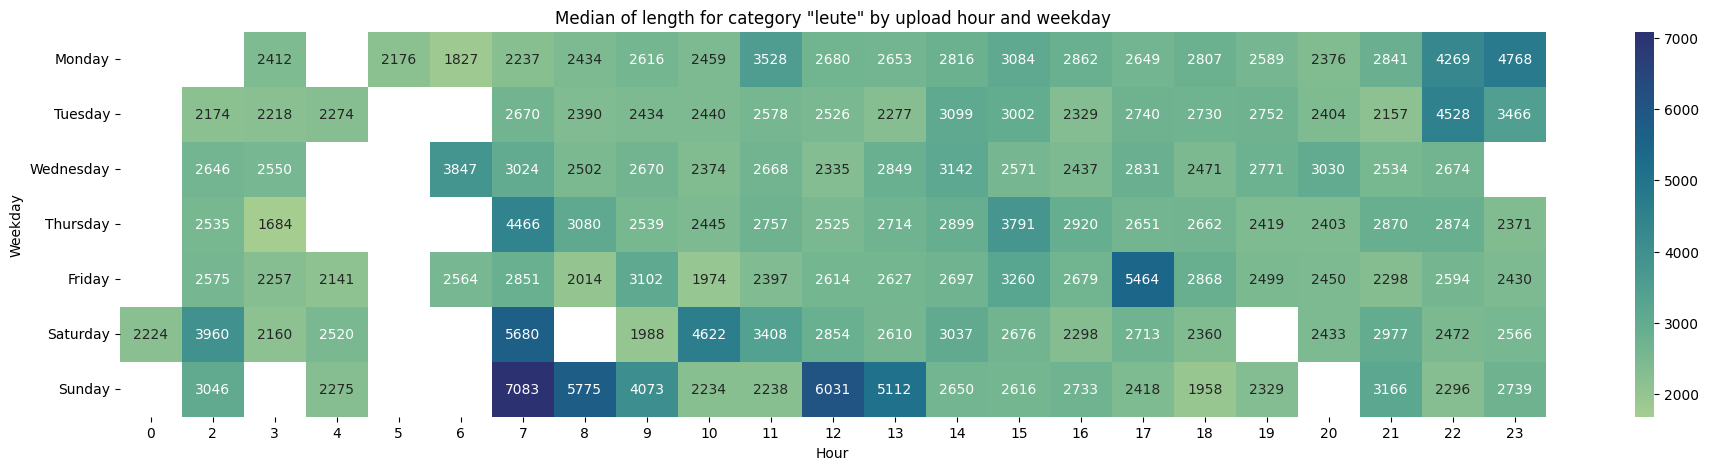

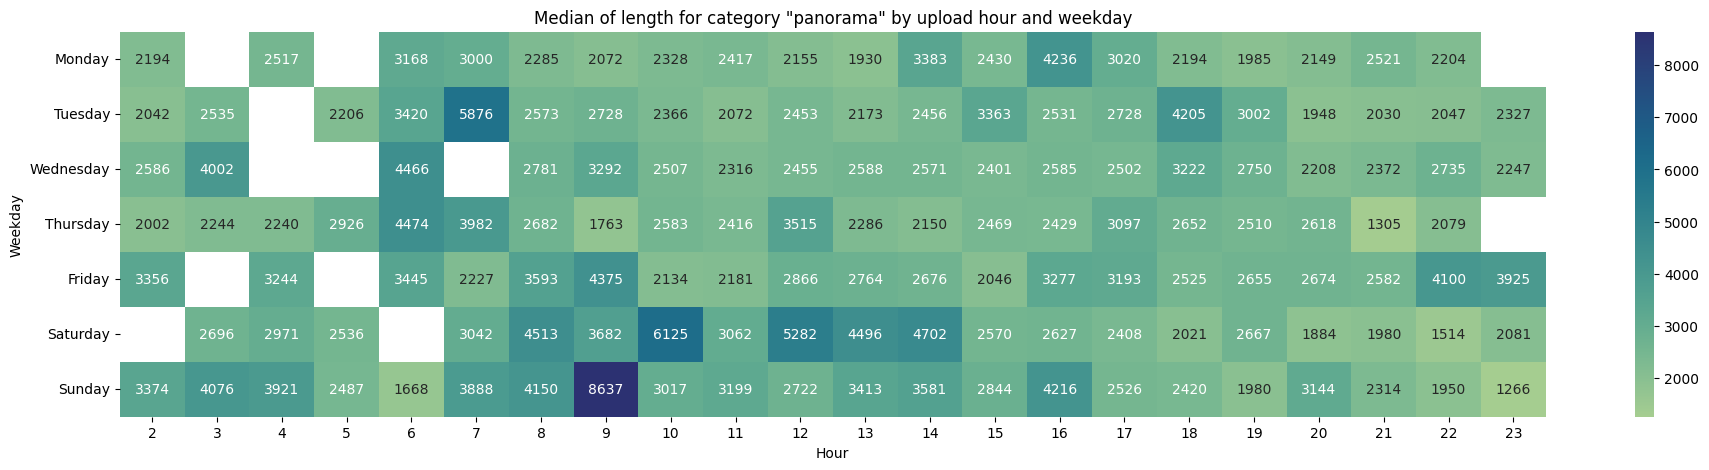

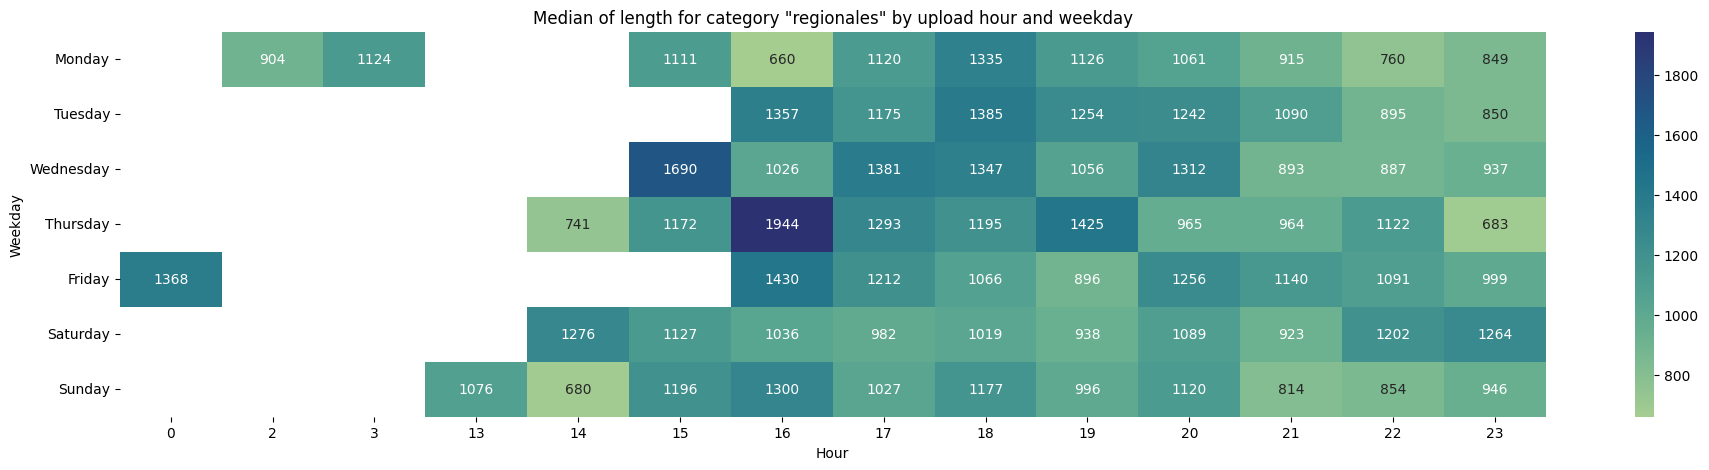

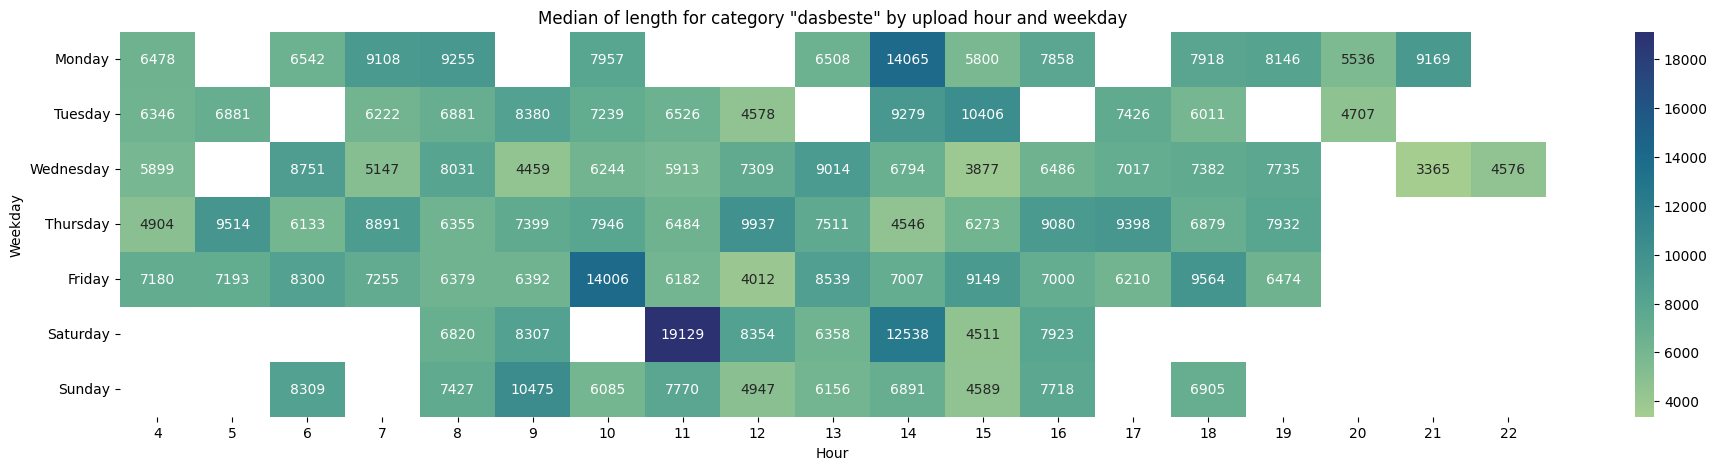

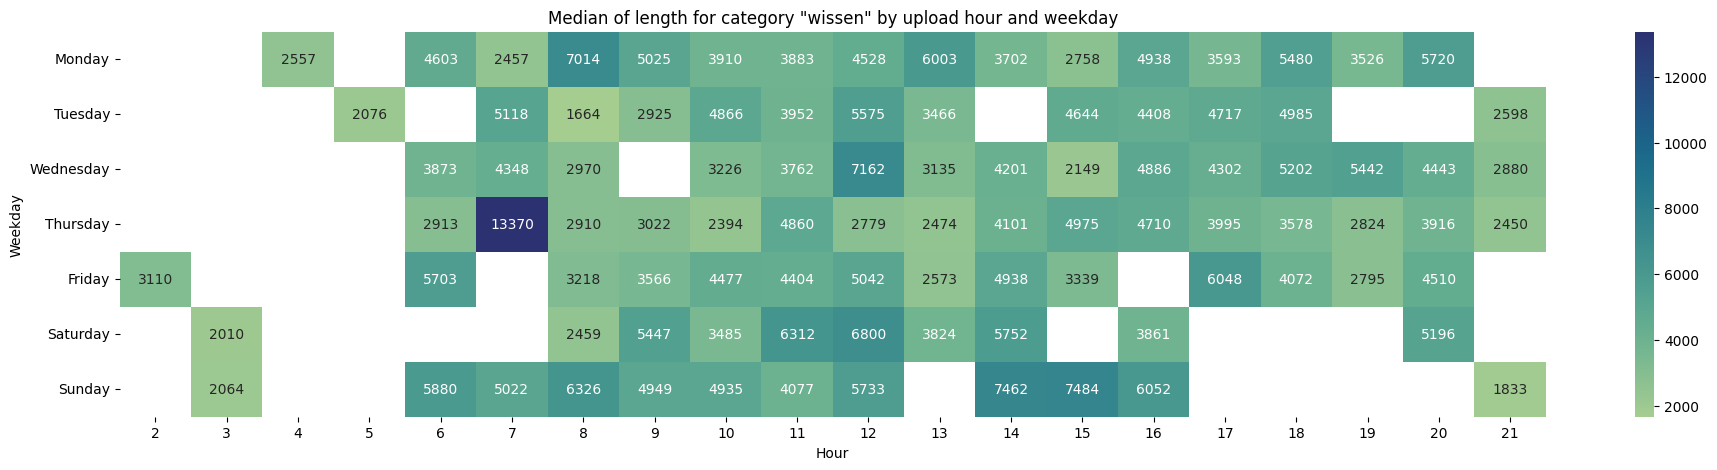

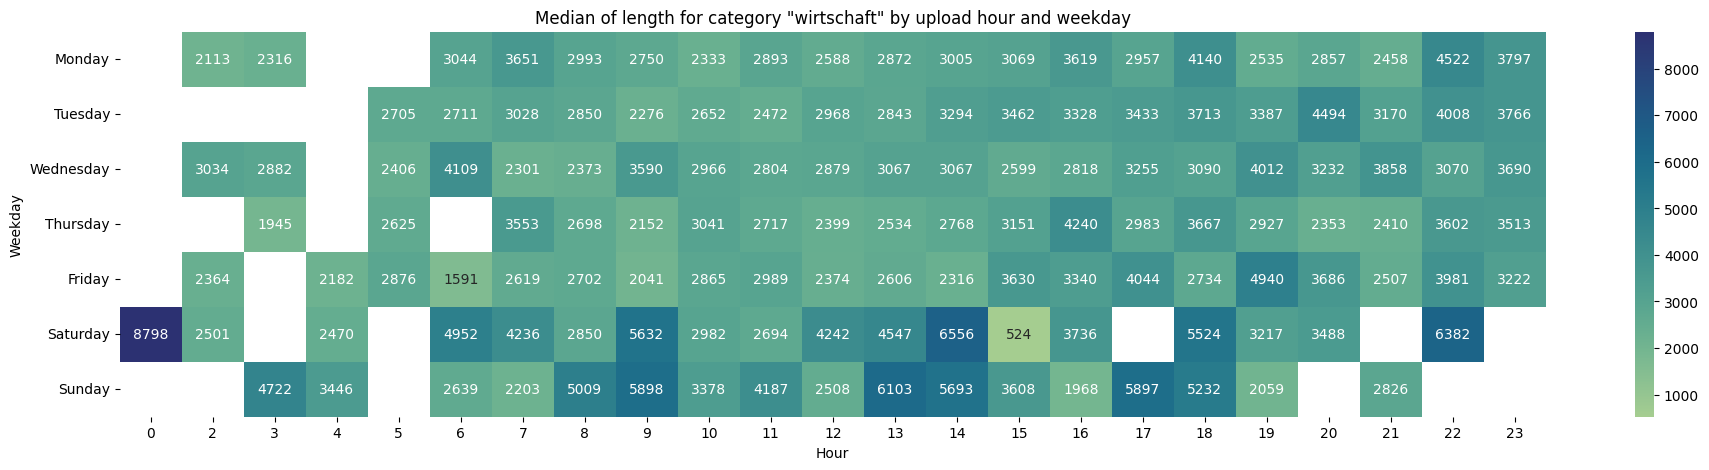

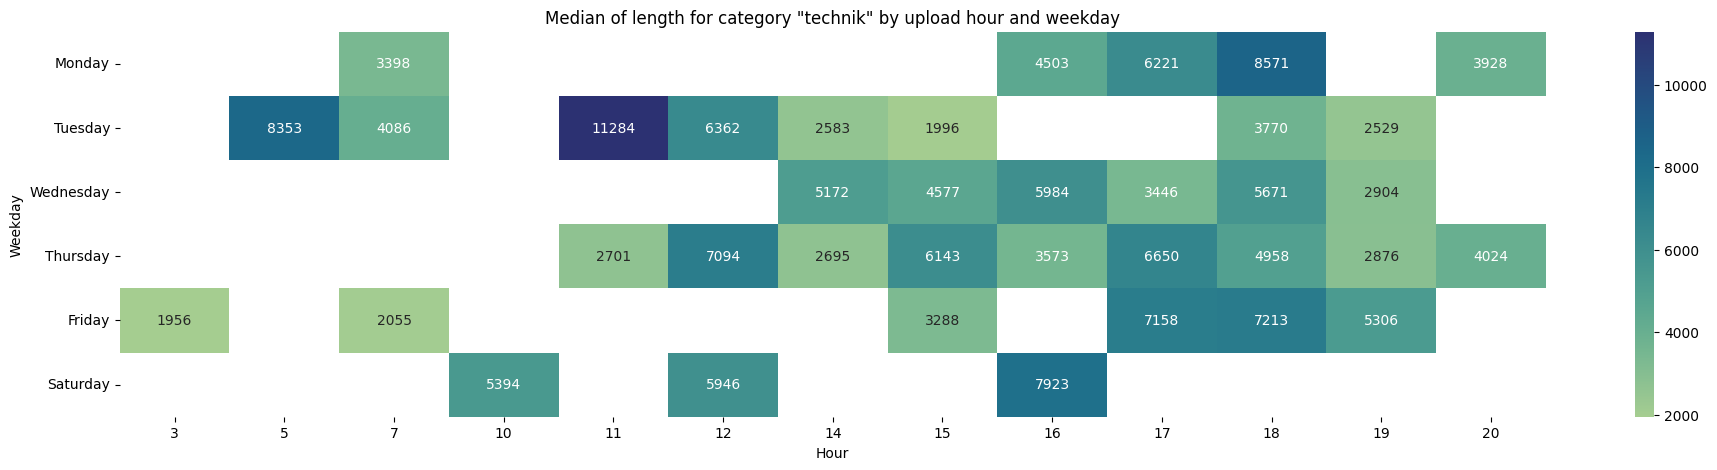

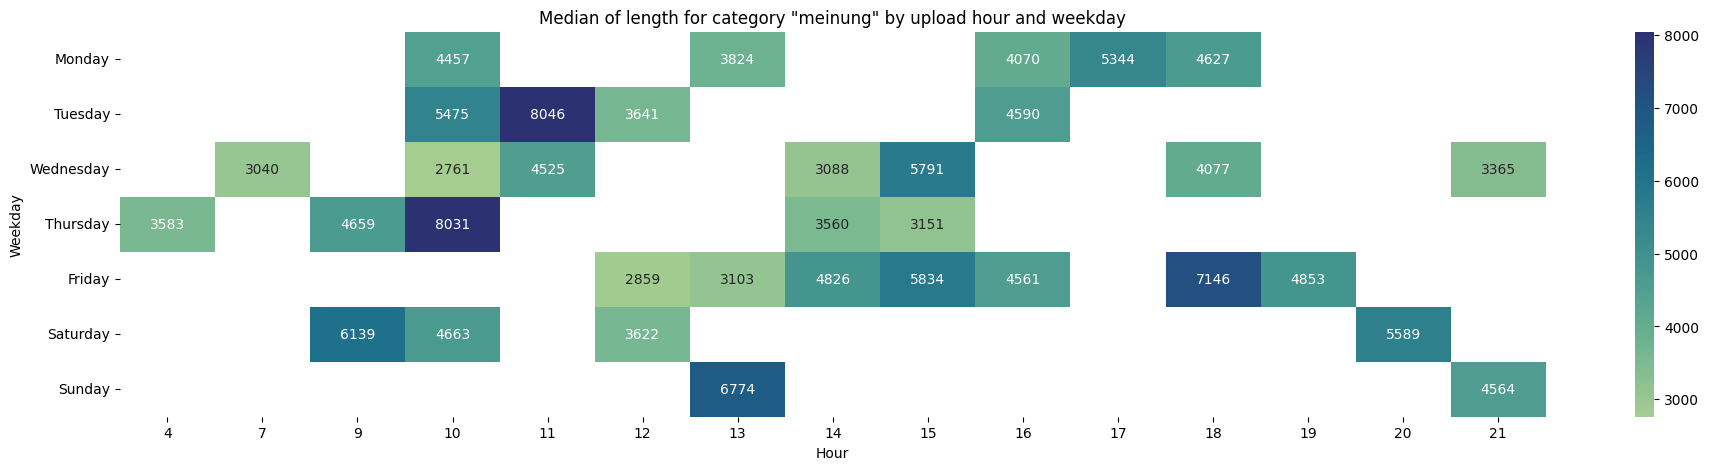

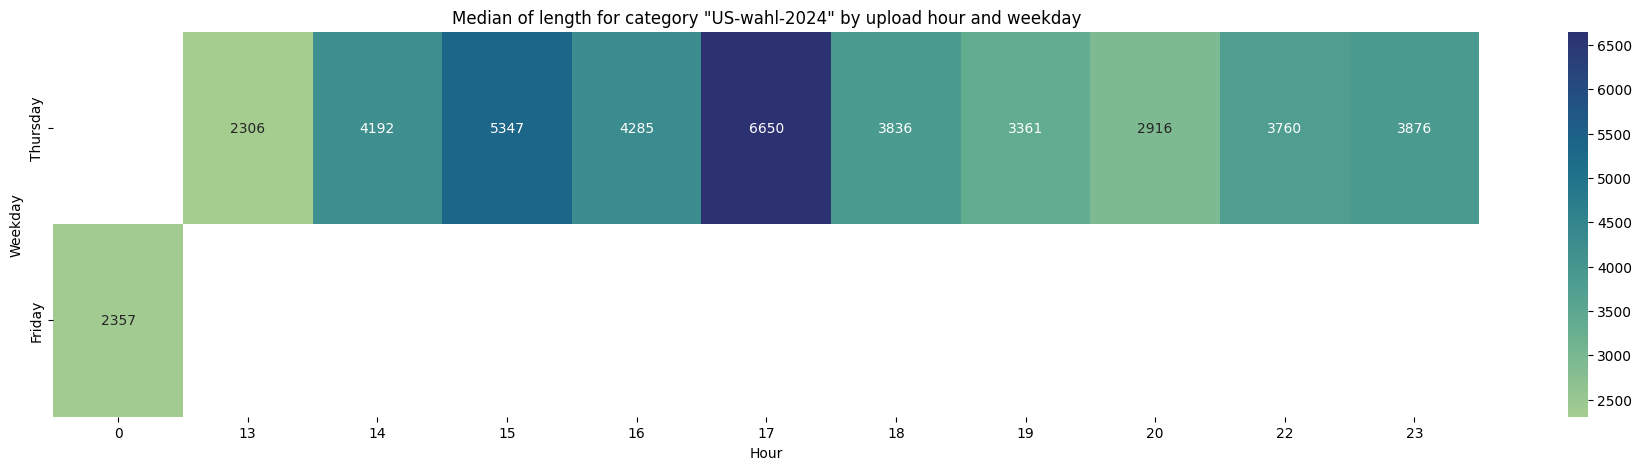

In [68]:
create_heatmap_for_length_per_category_by_hour_and_weekday(articles)

In [71]:
def create_bar_charts_for_length_of_hour_per_weekday_per_category(articles):
    categories = articles['category'].unique()
    for category in categories:
        category_data = articles[articles['category'] == category]
        median_by_hour = category_data.groupby('upload-hour', observed=False)['length'].median().reset_index()
        plt.figure(figsize=(10, 4))
        sns.barplot(x='upload-hour', y='length', data=median_by_hour)
        plt.title(f'Median der Textlänge pro Stunde für Kategorie {category}')
        plt.xlabel('Upload-Stunde')
        plt.ylabel('Median der Länge')
        plt.xticks(rotation=45)
        plt.show()

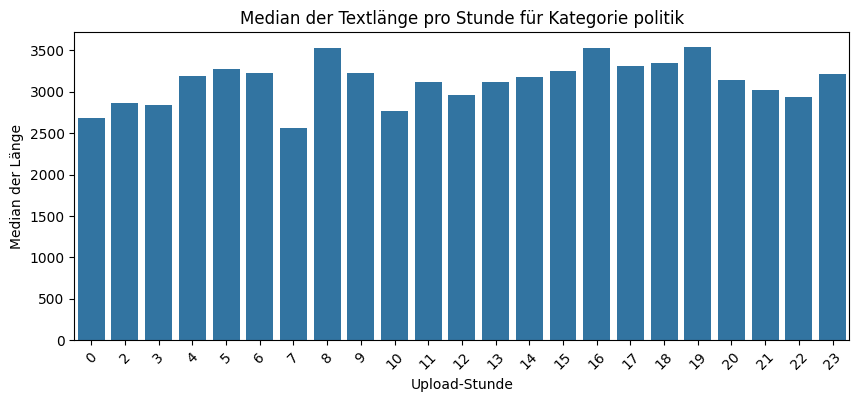

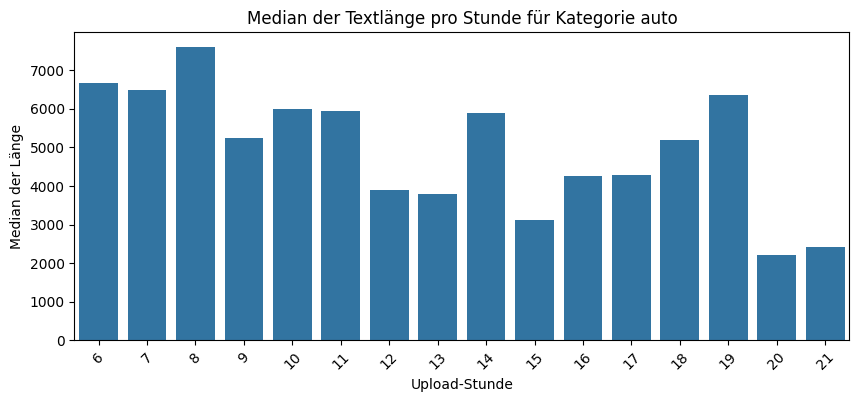

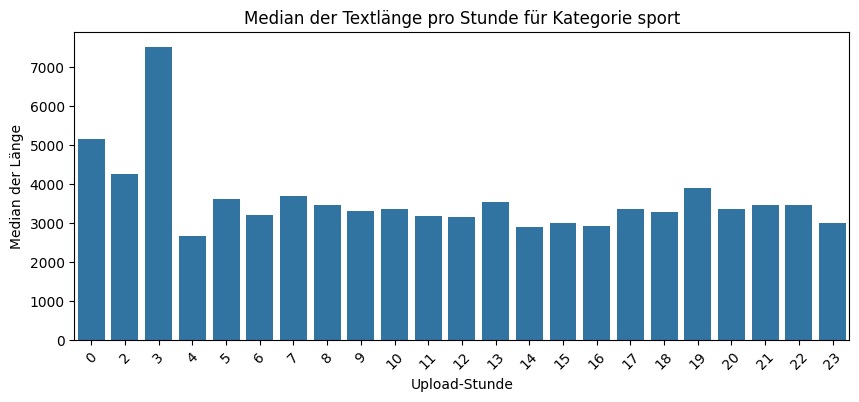

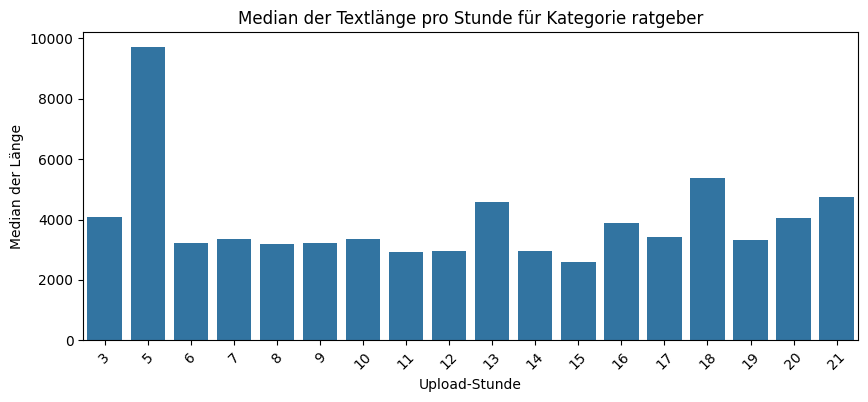

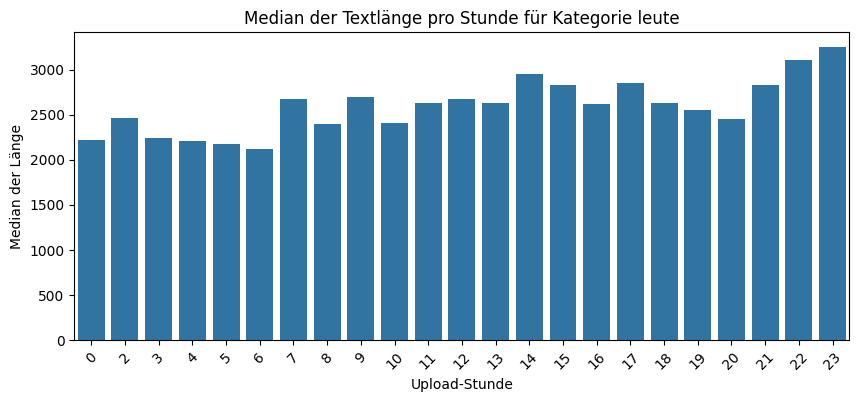

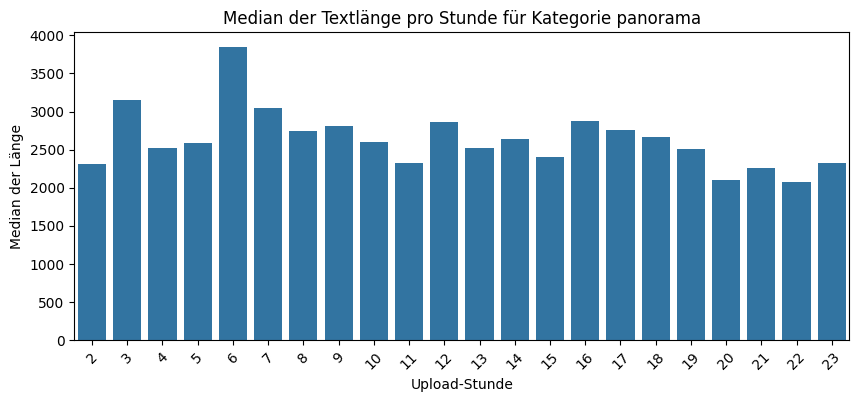

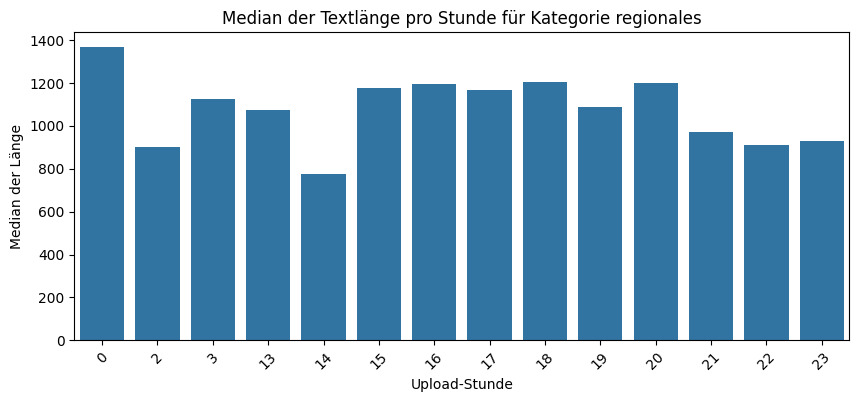

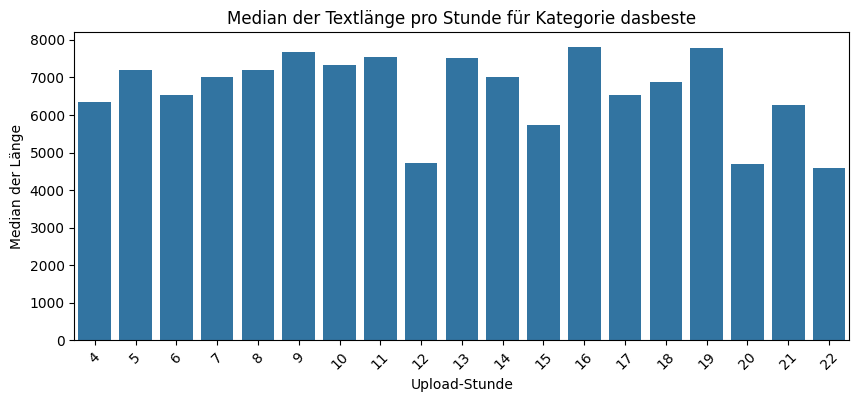

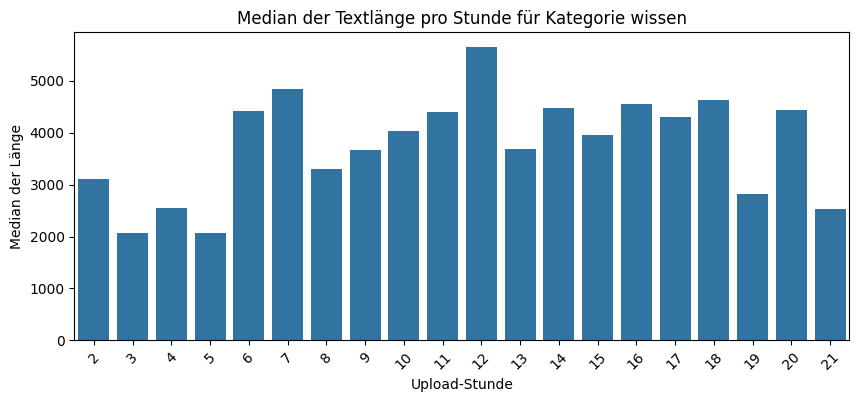

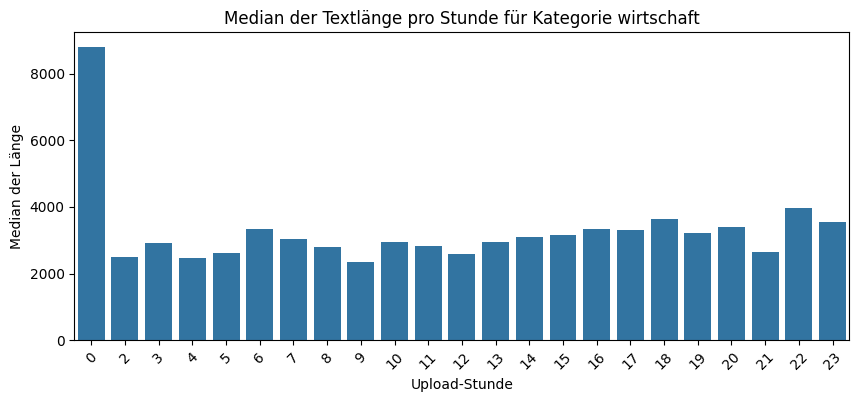

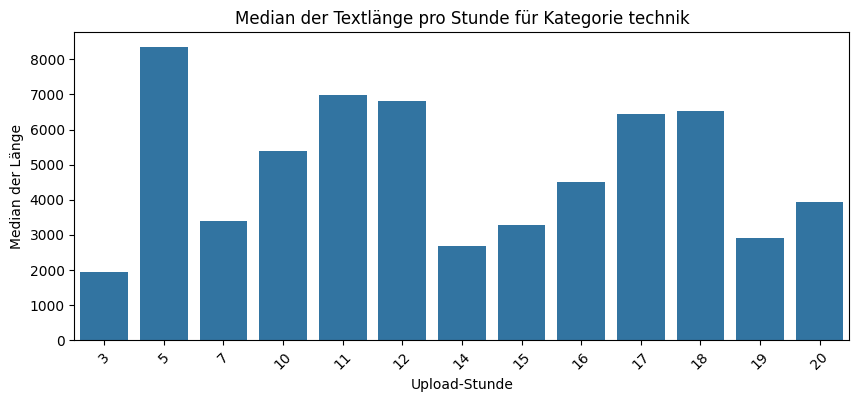

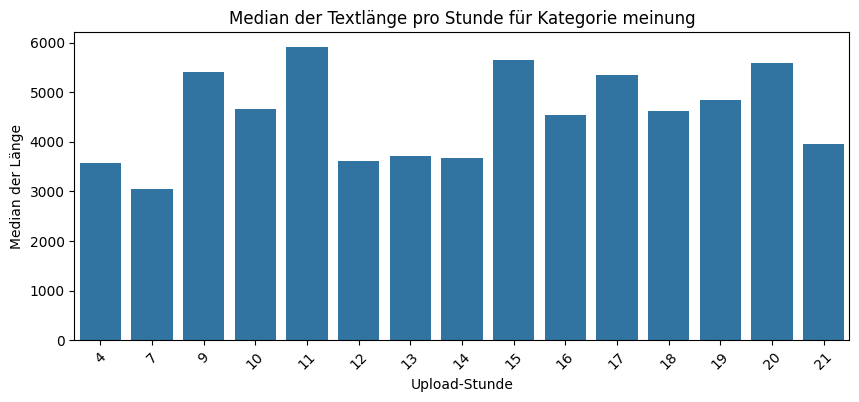

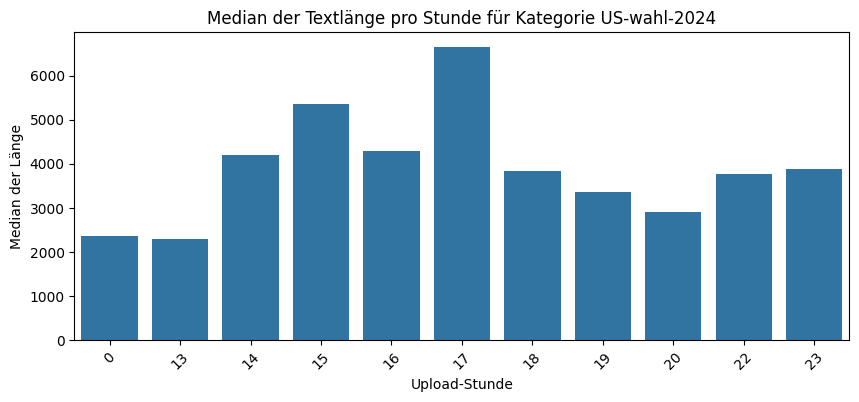

In [72]:
create_bar_charts_for_length_of_hour_per_weekday_per_category(articles)